<a href="https://colab.research.google.com/github/njonge-nathan/Capstone-Data-Mining-the-Water-Table.ipynb/blob/main/Capstone_Data_Mining_the_Water_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining the Water Table**

# **1.0 Defining the Question**

## a) Specifying the Question

The main objective of this project is to predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset based on a number of variables about what kind of pump is operating, when it was installed and how it is managed.

## b) Defining the metric of success

To successfully predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset.

## c) Understanding the context

Using data from Taarifa[http://taarifa.org/] and the Tanzanian Ministry of Water[http://maji.go.tz/], can you predict which pumps are functional, which need some repairs, and which don't work at all? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities.

## d) Recording the Experimental Design

* Importing the relevant libraries that we will use in our analysis
* Reading and exploring the dataset we will use for our project
* Defining the appropriateness of the available data with regards to the project
* Finding and dealing with outliers, anomalies, and missing data within the dataset.
* Performing univariate and bivariate analysis while recording our observations.
* Implementing the solution by using the various classifier algorithms to predict whether a waterpoint is functional,non functional or functional but needs repair based on the information provided.
* Challenging the solution by using a model that could outperform the best performing model identified earlier.
* Providing conclusions and recommendations based on the analysis  and various modelling techniques used in the project.

## e) Data Relevance

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - The number of private wells an aquifer can provide water to.
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
 
> Labels
Distribution of Labels
The labels in this dataset are simple. There are three possible values:
* functional - the waterpoint is operational and there are no repairs needed
* functional needs repair - the waterpoint is operational, but needs repairs
* non functional - the waterpoint is not operational


# **2.0 Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# **3.0 Loading the data**

In [3]:
# importing the train values dataset
train = pd.read_csv("/content/Training set values.csv")

# importing the train labels
labels = pd.read_csv("/content/Training set labels.csv")

# **4.0 Checking the dataset**

**Train dataset**

In [4]:
# previewing the first five rows
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# previewing the last five rows
train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


**Train labels dataset**

In [6]:
# previewing the first five rows 
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
# previewing the last five rows
labels.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


**Creating a new dataset by merging the train and labels dataset**

In [8]:
# merge the train values with the train labels
train_final = train.merge(labels , on='id')
train_final.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df = train_final[['date_recorded','construction_year']]
df.head()

,date_recorded,construction_year
0,2011-03-14,1999
1,2013-03-06,2010
2,2013-02-25,2009
3,2013-01-28,1986
4,2011-07-13,0


In [10]:
# check the dimensions
print(f"Our dataset has {train_final.shape} rows and columns")

Our dataset has (59400, 41) rows and columns


In [11]:
# check the datatypes 
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [12]:
# check summary statistics
train_final.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
# check for unique values
categorical_variables = [ 'funder', 
       'installer',  'wpt_name', 
       'basin', 'subvillage', 'region',  'lga',
       'ward',  'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group']
for column in categorical_variables:
  print(column)
  print(train_final[column].nunique())
  print(train_final[column].unique())
  print('\n')

funder
1897
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']


installer
2145
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']


wpt_name
37400
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']


basin
9
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


subvillage
19287
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


region
21
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


lga
125
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamo

# **5.0 Tidying the Dataset**

## a) Validity

In [14]:
# drop scheme_name column
train_final.drop(["scheme_name"], axis=1, inplace=True)

In [15]:
# confirming the column has been dropped
train_final.head(0)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


## **b) Completeness**

In [16]:
# check for percentage of null values in each column
(train_final.isna().sum()/train_final.shape[0])*100

id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   6.119529
gps_height               0.000000
installer                6.153199
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
num_private              0.000000
basin                    0.000000
subvillage               0.624579
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           5.612795
recorded_by              0.000000
scheme_management        6.526936
permit                   5.144781
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment                  0.000000
payment_type  

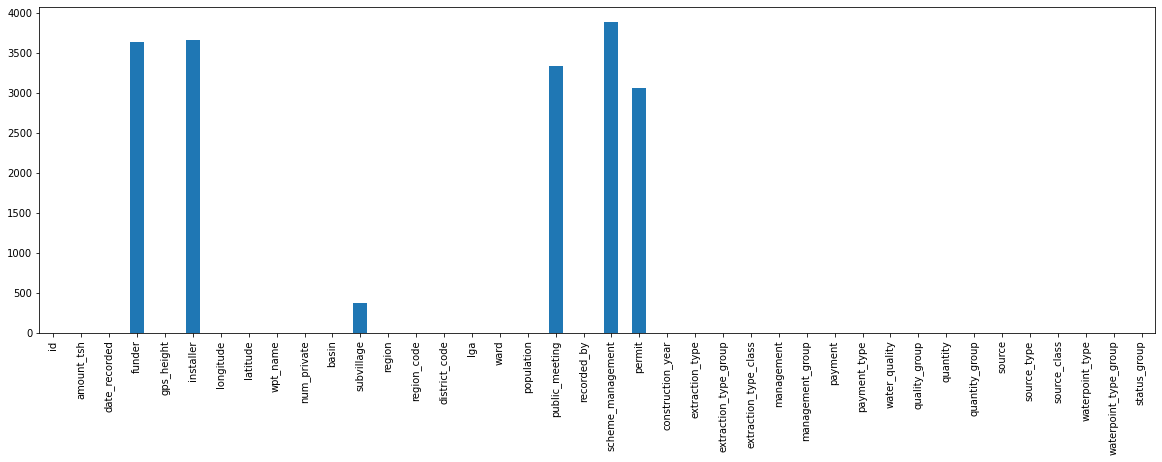

In [17]:
# visualizing our null values
train_final.isna().sum().plot(kind="bar",figsize=(20,6))
plt.show()

In [18]:
# drop rows with null values
train_final = train_final.dropna()
# confirming that the missing values have been dropped
train_final.isna().sum().sum()

0

## **c) Consistency**

In [19]:
# checking if our dataset has any duplicated values
train_final.duplicated().value_counts()

False    48288
dtype: int64

There were no duplicates in our dataset

## **d) Uniformity**

In [20]:
# checking our columns for uniformity
train_final.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [21]:
# changing the column names 
train_final = train_final.rename(columns = {"amount_tsh":"amount_water_available","num_private":"no_privatewells_aquifer","lga":"local_gvt_auth","gps_height":"altitude_of_well"})
# confirming that the columns names have changed
train_final.columns

Index(['id', 'amount_water_available', 'date_recorded', 'funder',
       'altitude_of_well', 'installer', 'longitude', 'latitude', 'wpt_name',
       'no_privatewells_aquifer', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'local_gvt_auth', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [22]:
# convert date from object to date time datatype
train_final['date_recorded'] = train_final['date_recorded'].apply(pd.to_datetime)

In [23]:
# confirming dtypes has been changed
train_final['date_recorded'].dtypes

dtype('<M8[ns]')

In [24]:
# convert category columns to category datatype
for col in ['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']:

    train_final[col] = train_final[col].astype('category')

In [25]:
# confirming dtypes has been changed
train_final[['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']].dtypes

funder                   category
installer                category
wpt_name                 category
basin                    category
subvillage               category
region                   category
local_gvt_auth           category
ward                     category
public_meeting           category
recorded_by              category
scheme_management        category
permit                   category
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment                  category
payment_type             category
water_quality            category
quality_group            category
quantity                 category
quantity_group           category
source                   category
source_type              category
source_class             category
waterpoint_type          category
waterpoint_type_group    category
status_group             category
dtype: object

## e) Accuracy

In [26]:
# checking if the amount of water availabe at a waterpoint is less than 0
(train_final[['amount_water_available','population','district_code','region_code','no_privatewells_aquifer']] < 0).sum()

amount_water_available     0
population                 0
district_code              0
region_code                0
no_privatewells_aquifer    0
dtype: int64

There were no values that were less than 0 

In [27]:
train_final[train_final['construction_year'] == 0]

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
12,36957,0.0,2012-10-14,World Vision,0,World vision,33.798106,-3.290194,Pamba,0,Internal,Nkilifa,Shinyanga,17,2,Maswa,Busilili,0,True,GeoData Consultants Ltd,WUG,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
30,46804,0.0,2011-03-23,Water,0,Water,36.108312,-5.791000,Ngosi,0,Wami / Ruvu,Karume,Dodoma,1,4,Chamwino,Dabalo,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59379,58255,0.0,2011-07-13,Do,0,DO,31.613284,-1.820226,Coffee Plantati,0,Lake Victoria,Kaluyango,Kagera,18,3,Muleba,Ikondo,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,Lake Victoria,Songambele,Kagera,18,30,Ngara,Nyamiyaga,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional


## e) Check for outliers

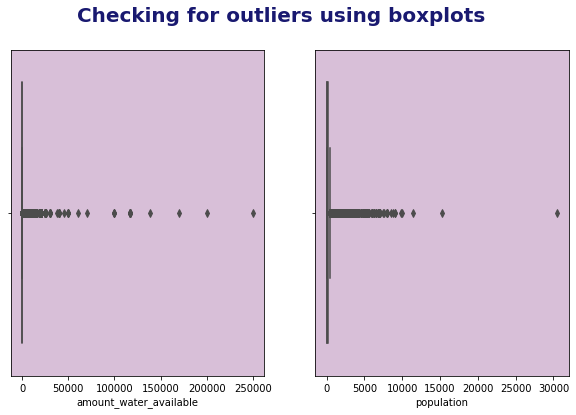

In [28]:
# checking for outliers in numerical columns
numerical_cols = train_final[['amount_water_available','population']]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),train_final,numerical_cols):
  sns.boxplot(train_final[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')

We will not drop the outliers

In [29]:
#obtaining the categorical columns
# train_final = train_final.select_dtypes(include=["category"]).copy()

# **6.0 Exploratory Data Analysis**

## **a) Univariate Analysis**

### **1. Histograms**

In [30]:
train_final.head(3)

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


Histogram of Altitude of well

Text(0.5, 1.0, 'Histogram')

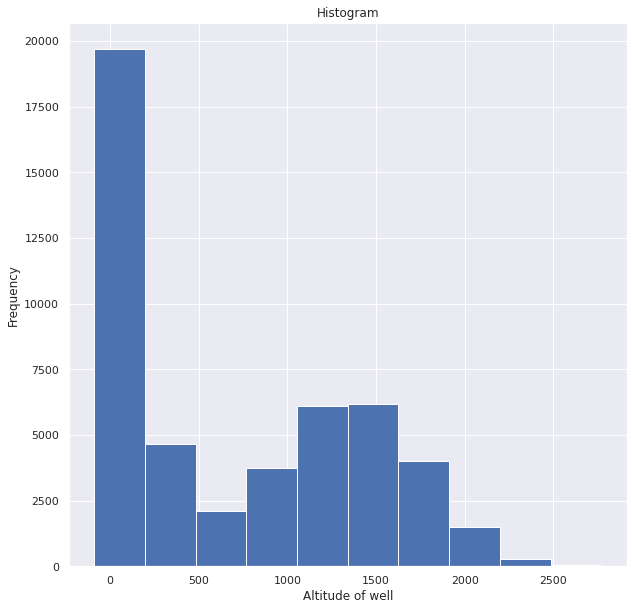

In [31]:
# Histogram of Altitude of well
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Altitude of well',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['altitude_of_well'].plot.hist().set_title('Histogram')

Text(0.5, 1.0, 'Histogram')

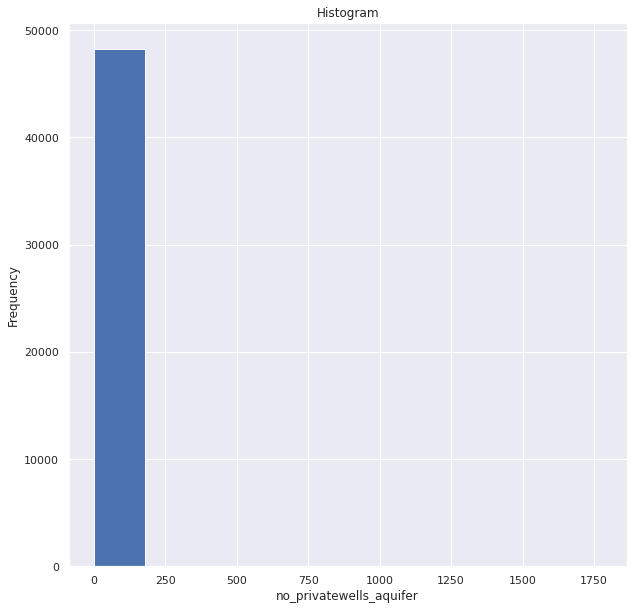

In [32]:
# Histogram of number privatewells aquifer
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('no_privatewells_aquifer',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['no_privatewells_aquifer'].plot.hist().set_title('Histogram')

Histogram of Amount of water available

Text(0.5, 1.0, 'Histogram')

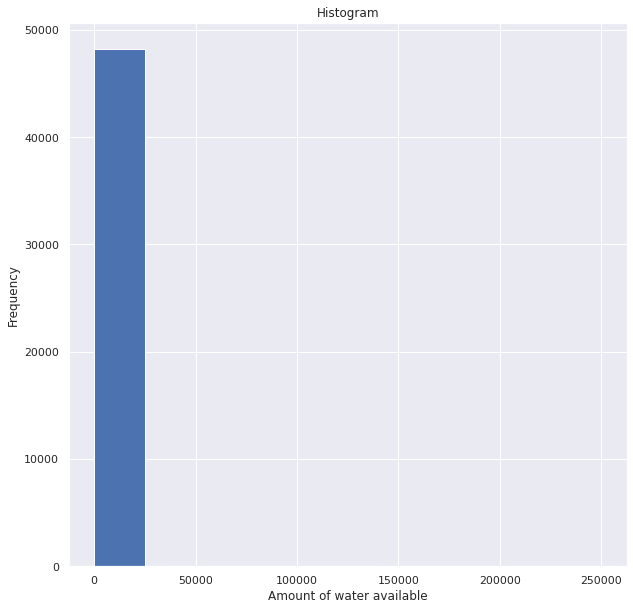

In [33]:
# Histogram of amount water available
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Amount of water available',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['amount_water_available'].plot.hist().set_title('Histogram')

Histogram of Population

Text(0.5, 1.0, 'Histogram')

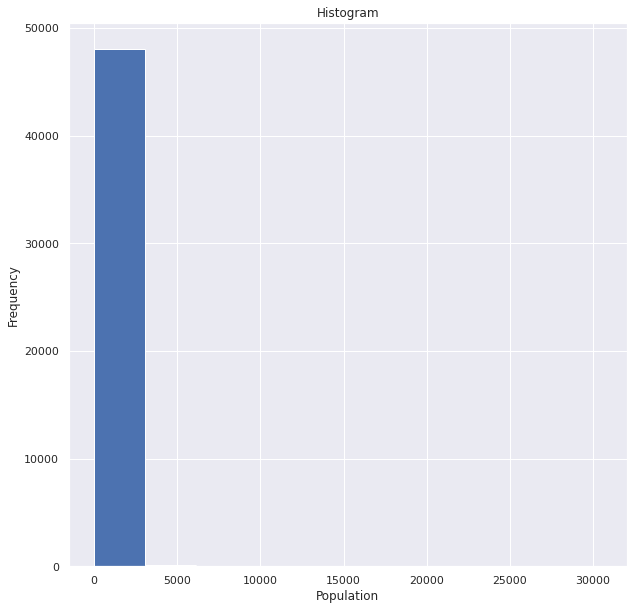

In [34]:
# Histogram of population
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Population',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))
train_final['population'].plot.hist().set_title('Histogram')

### **2. Countplot/Barplot**

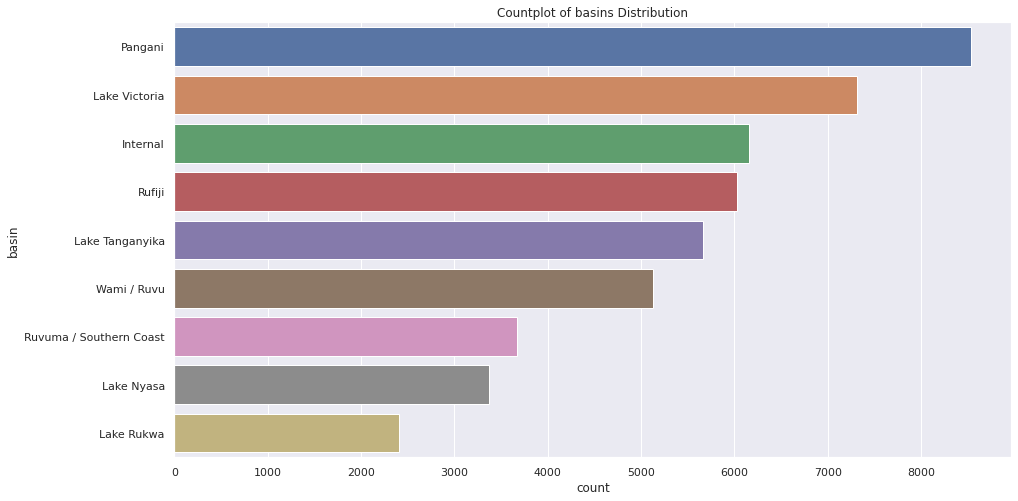

In [35]:
# countplot of basin distributions
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y='basin',
              data=train_final,
              order=train_final['basin'].value_counts().index).set_title("Countplot of basins Distribution")
plt.show()


**From our countplot of basins Lake Rukwa had the least count of 2402 while Pangani had the highest count with 8540.**

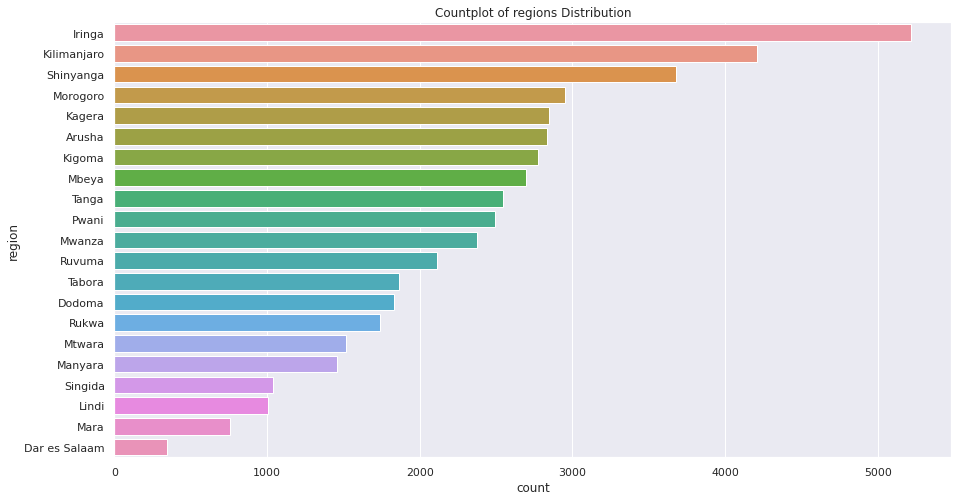

In [36]:
# countplot of region distributions
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y='region',
              data=train_final,
              order=train_final['region'].value_counts().index).set_title("Countplot of regions Distribution")
plt.show()

From our countplot of regions Iringa had a higher count with 5220 while Dar es Salaam had the least count with 344

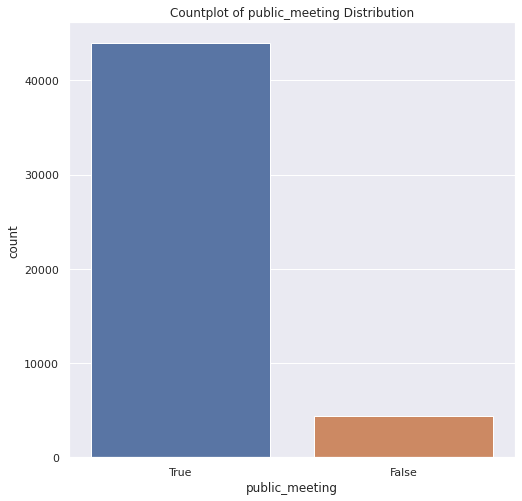

In [37]:
# countplot of public_meeting distributions
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x='public_meeting',
              data=train_final,
              order=train_final['public_meeting'].value_counts().index).set_title("Countplot of public_meeting Distribution")
plt.show()

From our count plot majority of the records had public meetings

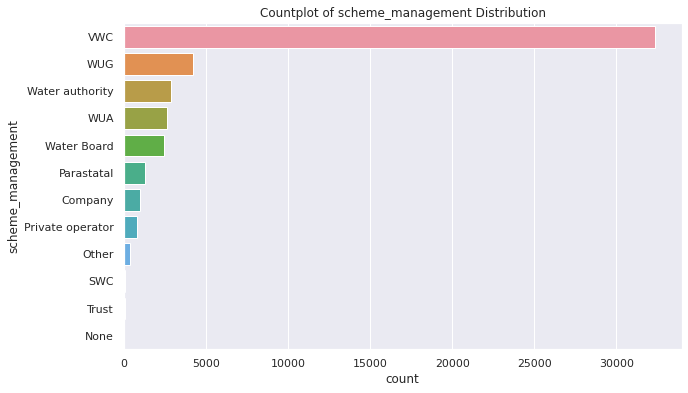

In [38]:
# countplot of scheme_management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='scheme_management',
              data=train_final,
              order=train_final['scheme_management'].value_counts().index).set_title("Countplot of scheme_management Distribution")
plt.show()

VWC had the highest count with more than 30,000 

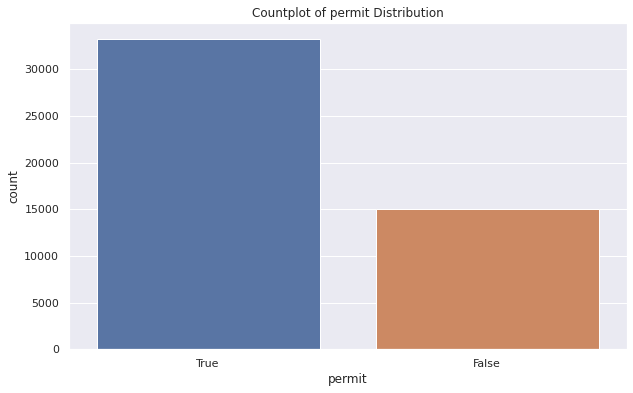

In [39]:
# countplot of permit distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='permit',
              data=train_final,
              order=train_final['permit'].value_counts().index).set_title("Countplot of permit Distribution")
plt.show()

From the above plot majority of the waterpoints had permits

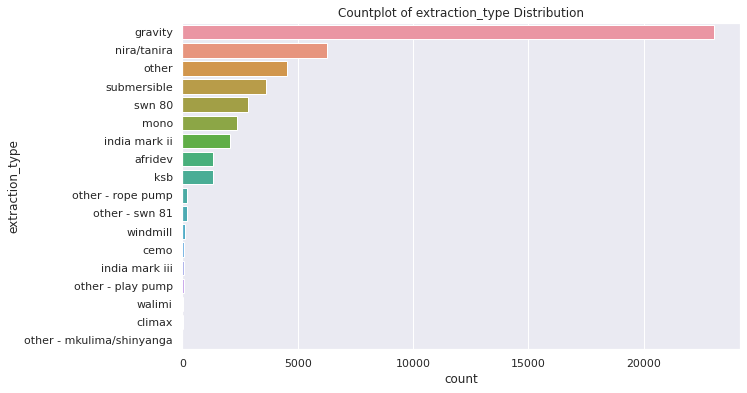

In [40]:
# countplot of extraction_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type',
              data=train_final,
              order=train_final['extraction_type'].value_counts().index).set_title("Countplot of extraction_type Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type was gravity.

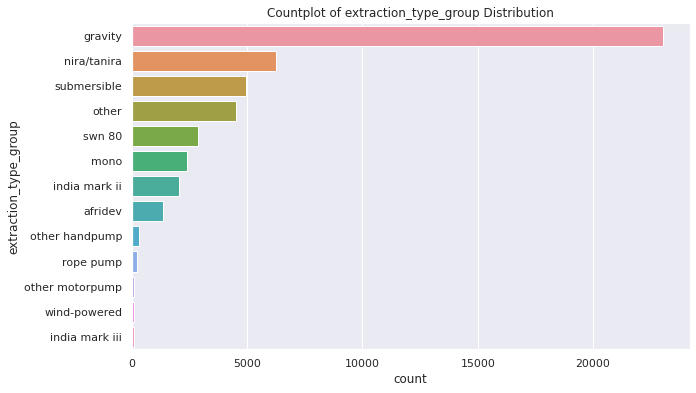

In [41]:
# countplot of extraction_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type_group',
              data=train_final,
              order=train_final['extraction_type_group'].value_counts().index).set_title("Countplot of extraction_type_group Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type group was gravity.

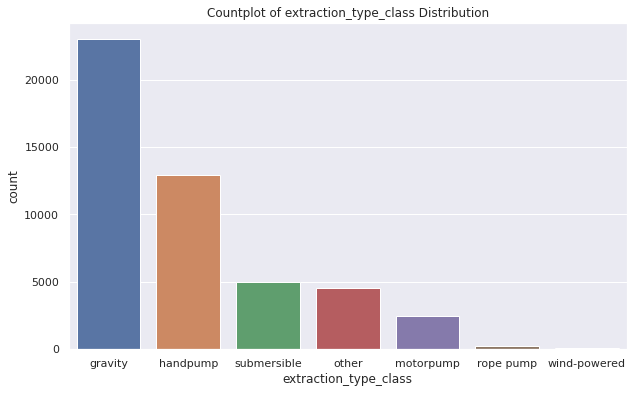

In [42]:
# countplot of extraction_type_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='extraction_type_class',
              data=train_final,
              order=train_final['extraction_type_class'].value_counts().index).set_title("Countplot of extraction_type_class Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type class was gravity this could be because Tanzania exhibits a mountainous terrain

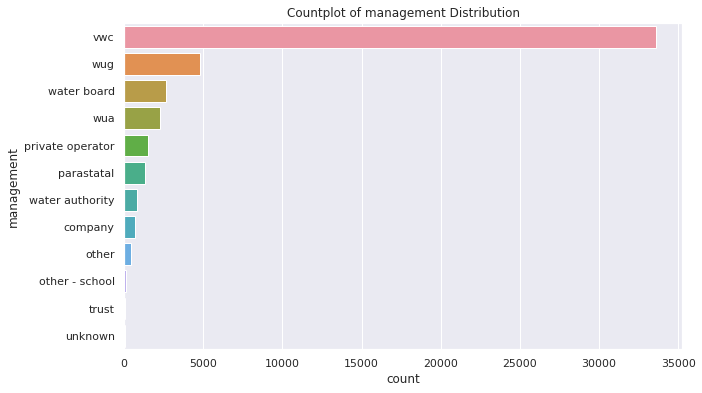

In [43]:
# countplot of management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='management',
              data=train_final,
              order=train_final['management'].value_counts().index).set_title("Countplot of management Distribution")
plt.show()

From our countplot village water committee managed majority of the waterpoints

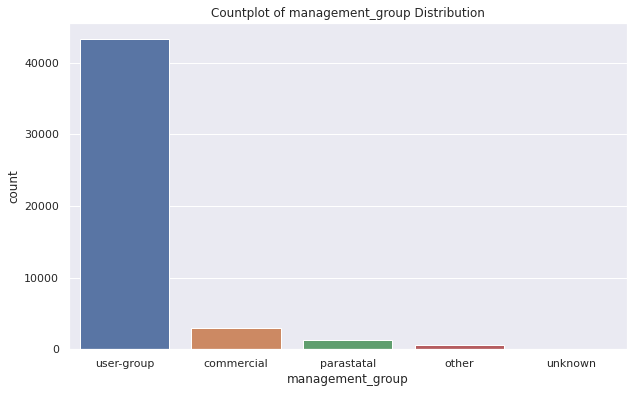

In [44]:
# countplot of management_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='management_group',
              data=train_final,
              order=train_final['management_group'].value_counts().index).set_title("Countplot of management_group Distribution")
plt.show()

From our plot above on the management group user group had a higher count

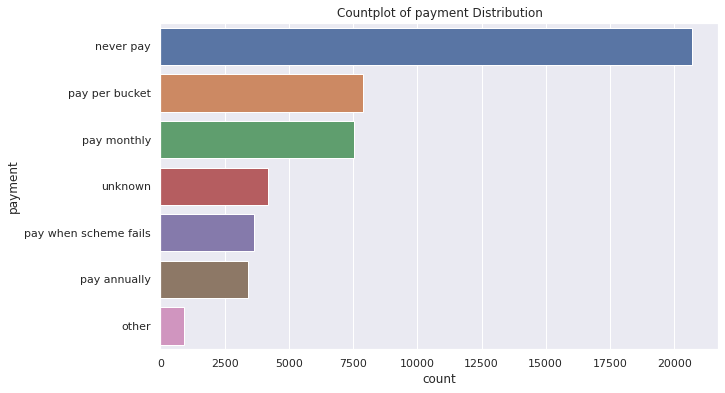

In [45]:
# countplot of payment distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='payment',
              data=train_final,
              order=train_final['payment'].value_counts().index).set_title("Countplot of payment Distribution")
plt.show()

From our plot above on payment never pay was the most common  

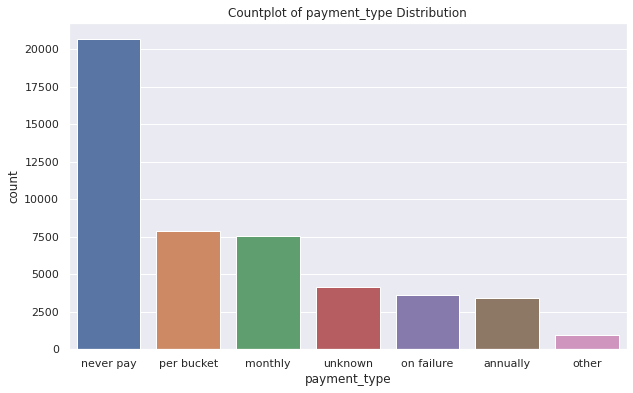

In [46]:
# countplot of payment_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='payment_type',
              data=train_final,
              order=train_final['payment_type'].value_counts().index).set_title("Countplot of payment_type Distribution")
plt.show()

From our plot above on payment type never pay was the most common

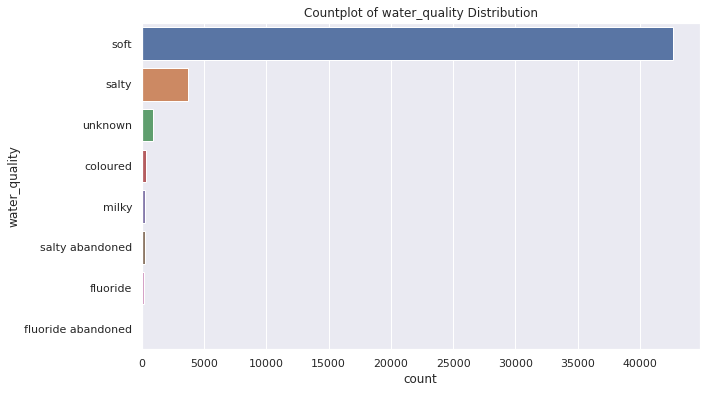

In [47]:
# countplot of water_quality distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='water_quality',
              data=train_final,
              order=train_final['water_quality'].value_counts().index).set_title("Countplot of water_quality Distribution")
plt.show()

From our plot most water points have soft water quality

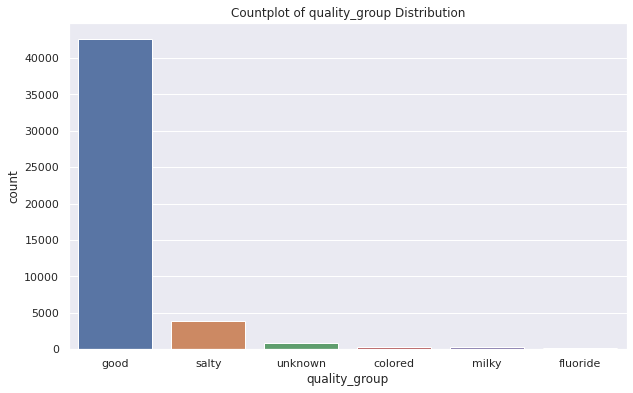

In [48]:
# countplot of quality_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quality_group',
              data=train_final,
              order=train_final['quality_group'].value_counts().index).set_title("Countplot of quality_group Distribution")
plt.show()

From our plot above good quality was the most common water quality group 

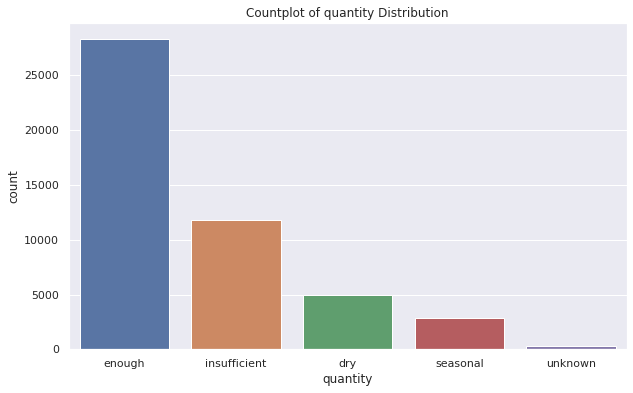

In [49]:
# countplot of quantity distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity',
              data=train_final,
              order=train_final['quantity'].value_counts().index).set_title("Countplot of quantity Distribution")
plt.show()

The water points mostly had enough water 

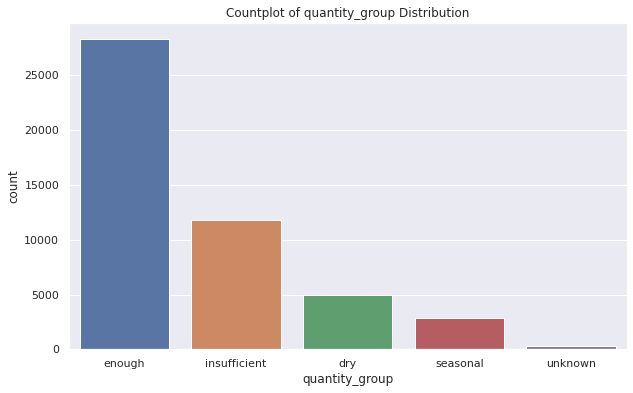

In [50]:
# countplot of quantity_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity_group',
              data=train_final,
              order=train_final['quantity_group'].value_counts().index).set_title("Countplot of quantity_group Distribution")
plt.show()

The water points mostly had enough water

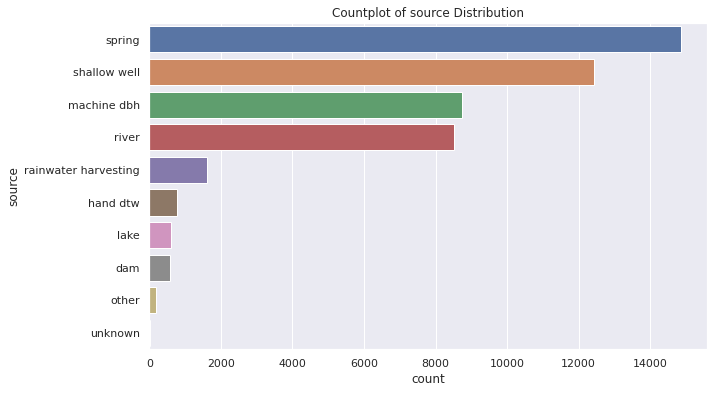

In [51]:
# countplot of source distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source',
              data=train_final,
              order=train_final['source'].value_counts().index).set_title("Countplot of source Distribution")
plt.show()

Majority of the water points source of water is springs followed by shallow well.

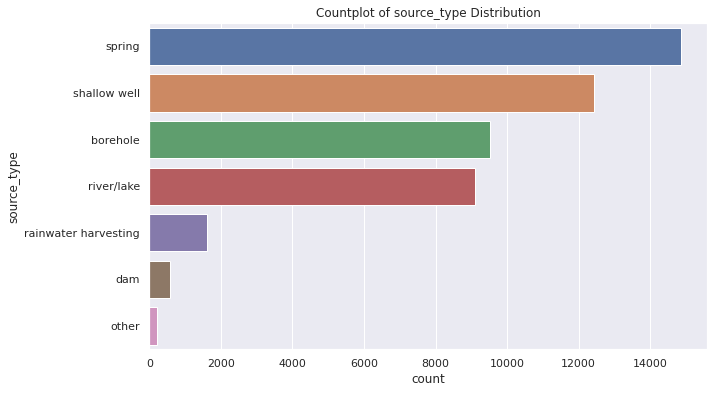

In [52]:
# countplot of source_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source_type',
              data=train_final,
              order=train_final['source_type'].value_counts().index).set_title("Countplot of source_type Distribution")
plt.show()

Majority of the water points source of water is springs followed by shallow well.

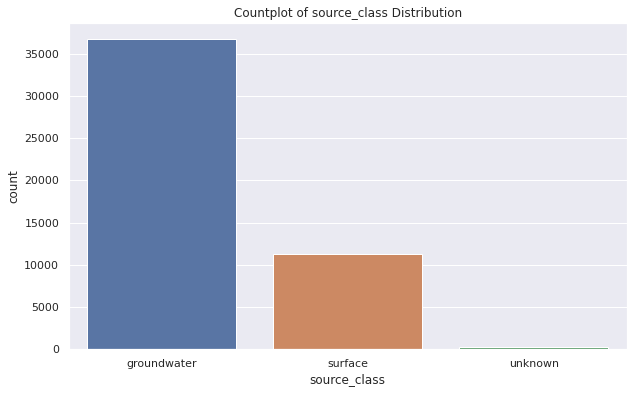

In [53]:
# countplot of source_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='source_class',
              data=train_final,
              order=train_final['source_class'].value_counts().index).set_title("Countplot of source_class Distribution")
plt.show()

From our plot above groundwater is the most common source class followed by surface

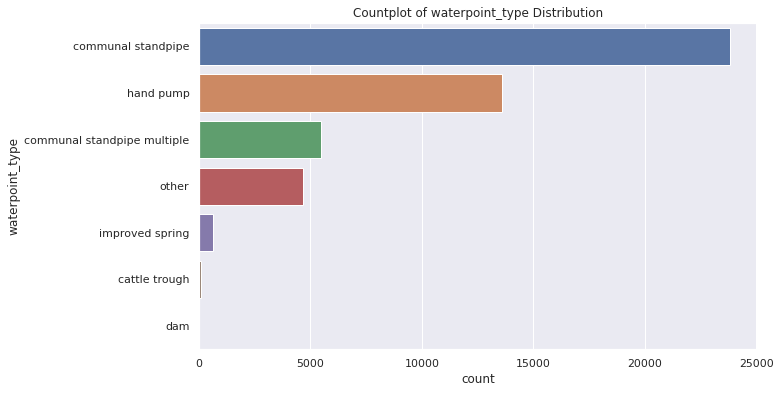

In [54]:
# countplot of waterpoint_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type',
              data=train_final,
              order=train_final['waterpoint_type'].value_counts().index).set_title("Countplot of waterpoint_type Distribution")
plt.show()

The common waterpoint type was the communal standpipe followed by the hand pump

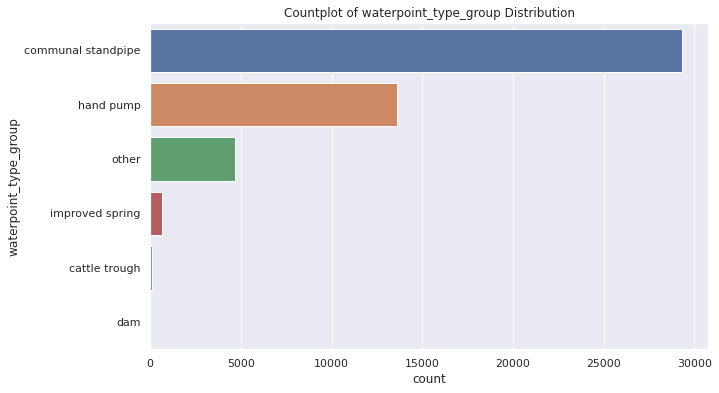

In [55]:
# countplot of waterpoint_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type_group',
              data=train_final,
              order=train_final['waterpoint_type_group'].value_counts().index).set_title("Countplot of waterpoint_type_group Distribution")
plt.show()

The common waterpoint type group was the communal standpipe followed by the hand pump

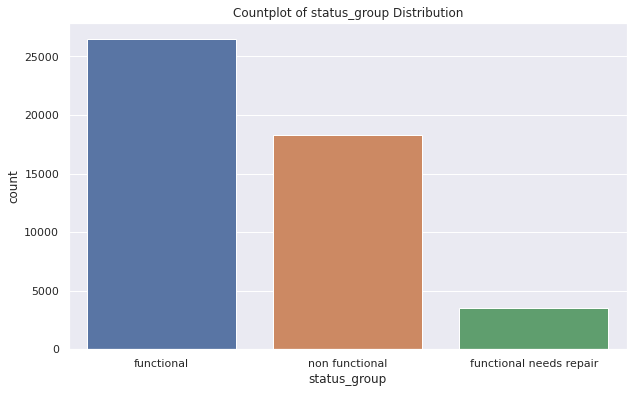

In [56]:
# countplot of status_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='status_group',
              data=train_final,
              order=train_final['status_group'].value_counts().index).set_title("Countplot of status_group Distribution")
plt.show()

Most of the water points status was functional and few were functional and needed repair

### **3. Frequency Tables**

In [57]:
categorical_columns = train_final[['basin', 'region', 
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']]


for column in categorical_columns:
  print('\n')
  print(f'number of unique values in {column} is: {train_final[column].nunique()}')
  print(train_final[column].value_counts())           




number of unique values in basin is: 9
Pangani                    8540
Lake Victoria              7319
Internal                   6155
Rufiji                     6031
Lake Tanganyika            5663
Wami / Ruvu                5127
Ruvuma / Southern Coast    3675
Lake Nyasa                 3376
Lake Rukwa                 2402
Name: basin, dtype: int64


number of unique values in region is: 21
Iringa           5220
Kilimanjaro      4206
Shinyanga        3680
Morogoro         2953
Kagera           2845
Arusha           2836
Kigoma           2774
Mbeya            2695
Tanga            2543
Pwani            2490
Mwanza           2378
Ruvuma           2115
Tabora           1862
Dodoma           1830
Rukwa            1741
Mtwara           1518
Manyara          1458
Singida          1040
Lindi            1005
Mara              755
Dar es Salaam     344
Name: region, dtype: int64


number of unique values in public_meeting is: 2
True     43940
False     4348
Name: public_meeting, dtype: int6

In [58]:
cat_cols = train_final[['funder','installer','wpt_name','subvillage','local_gvt_auth','ward']]

for col in cat_cols:
  print('\n')
  print(f'The top 10  values in {col}')
  print(train_final[col].value_counts().nlargest(10))
  



The top 10  values in funder
Government Of Tanzania    8080
Danida                    2920
Hesawa                    1388
Kkkt                      1260
World Bank                1086
World Vision              1044
Unicef                    1005
Rwssp                      802
District Council           801
Tasaf                      787
Name: funder, dtype: int64


The top 10  values in installer
DWE                   14637
Government             1438
RWE                    1031
Commu                   893
KKKT                    885
DANIDA                  861
TCRS                    668
Central government      616
CES                     610
Hesawa                  560
Name: installer, dtype: int64


The top 10  values in wpt_name
none               3356
Shuleni            1354
Zahanati            619
Msikitini           447
Bombani             252
Kanisani            250
Sokoni              222
Ofisini             205
Shule               146
Shule Ya Msingi     144
Name: wpt_name,

In [59]:
for col in cat_cols:
  print('\n')
  print(f'The 10 least values in {col}')
  print(train_final[col].value_counts().nsmallest(10))



The 10 least values in funder
Dsdp                              1
African Reflections Foundation    1
Dsp                               1
Irevea Sister Water               1
Ifakara                           1
Iom                               1
Cper                              1
Drwssp                            1
Dqnida                            1
Community Bank                    1
Name: funder, dtype: int64


The 10 least values in installer
Tarangire park                    1
Tanzania Egypt Technical Co Op    1
Tanzania government               1
DDSA                              1
Tanza                             1
Tanzania/ Egypt                   1
Team Rafiki                       1
Tareto                            1
Tasaf and Lga                     1
Te                                1
Name: installer, dtype: int64


The 10 least values in wpt_name
Kwa Herman Mwasanyila    1
Kwa Dyuke Mwakifuna      1
Kwa Heshimuni Uromi      1
Kwa Dunia                1
Kwa Hermany   

### **4. Pie Charts**

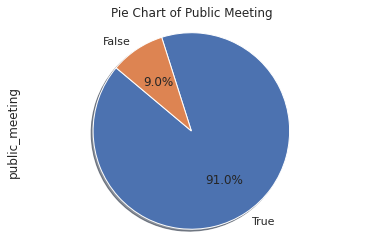

In [60]:
#Pie chart to show the percentage total of Publib meetings held
train_final['public_meeting'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of Public Meeting')
plt.show()

From our piechart of public meeting majority held public meeting with a percent of 91% while 9% did not.

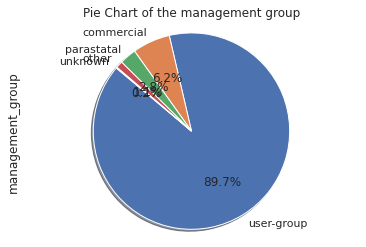

In [61]:
#Pie chart to show the percentage total of management groups
train_final['management_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the management group')
plt.show()

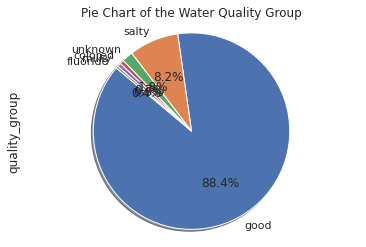

In [62]:
#Pie chart to show the percentage total of water quality group
train_final['quality_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Water Quality Group')
plt.show()

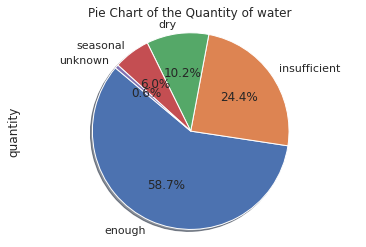

In [63]:
#Pie chart to show the percentage total of water quantity available at the water point
train_final['quantity'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Quantity of water ')
plt.show()

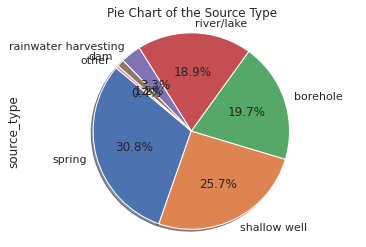

In [64]:
#Pie chart to show the percentage total of source type
train_final['source_type'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Source Type')
plt.show()

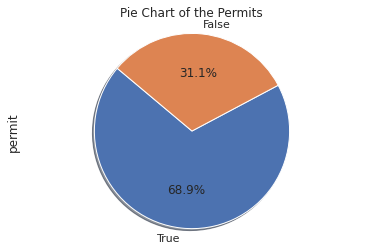

In [65]:
#Pie chart to show the percentage total of permits
train_final['permit'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------

plt.axis('equal')
plt.title('Pie Chart of the Permits')
plt.show()

From our plot above majority of the water points had permits leading at 68.9% while few did not have permits at 31.1%

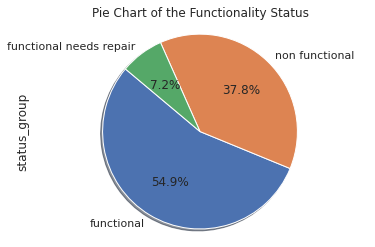

In [66]:
#Pie chart to show the percentage total of waterpoint status group
train_final['status_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Functionality Status')
plt.show()

The piechart shows class imbalance in the status group column with functional taking 54.9%, non-functional 37.8% and functional needs repair 7.2%

### **5. Measures of Central Tendency**

In [67]:
# assigning numerical columns
numerical_cols = train_final[['amount_water_available','altitude_of_well',"construction_year","population"]]

**Mode and median**

In [68]:
#mode and median
for col in numerical_cols:
  print("mode")
  print("Variable:",col)
  print(train_final[col].mode())
  print("median")
  print(train_final[col].median())
  print("\n")

mode
Variable: amount_water_available
0    0.0
dtype: float64
median
0.0


mode
Variable: altitude_of_well
0    0
dtype: int64
median
463.0


mode
Variable: construction_year
0    0
dtype: int64
median
1987.0


mode
Variable: population
0    0
dtype: int64
median
30.0




### **6. Measures of central dispersion**

**Variance**

In [69]:
#variance
numerical_cols.var().to_frame(name="Variance")

,Variance
amount_water_available,8.000056e+06
altitude_of_well,4.883371e+05
construction_year,8.782435e+05
population,2.232614e+05


**Standard Deviation**

In [70]:
#standard deviation
numerical_cols.std().to_frame(name="Standard Deviation")

,Standard Deviation
amount_water_available,2828.437040
altitude_of_well,698.811196
construction_year,937.146464
population,472.505399


**Range**

In [71]:
#range
max = numerical_cols.max()
min = numerical_cols.min()
range= max - min
range.to_frame(name="Range")

,Range
amount_water_available,250000.0
altitude_of_well,2860.0
construction_year,2013.0
population,30500.0


**Quantiles**

In [72]:
#quantiles
numerical_cols.quantile([0.25,0.50,0.75])

,amount_water_available,altitude_of_well,construction_year,population
0.25,0.0,0.0,0.0,0.0
0.50,0.0,463.0,1987.0,30.0
0.75,50.0,1335.0,2005.0,200.0


**Skewness**

In [73]:
skewness = numerical_cols.skew().reset_index(name="Skewness Value")
skewness.rename(columns={"index":"numerical columns"},inplace=True)
skewness.loc[skewness["Skewness Value"]==0,"Distribution"] ="Symmetric"
skewness.loc[skewness["Skewness Value"] > 0, "Distribution"] = "Positively Skewed"
skewness.loc[skewness["Skewness Value"] < 0, "Distribution"] = "Negatively Skewed"
skewness

,numerical columns,Skewness Value,Distribution
0,amount_water_available,43.636911,Positively Skewed
1,altitude_of_well,0.407391,Positively Skewed
2,construction_year,-0.734702,Negatively Skewed
3,population,13.617763,Positively Skewed


**Kurtosis**

In [74]:
kurtosis = numerical_cols.kurt().reset_index(name="Kurtosis Distribution")
kurtosis.rename(columns = {"index":"numerical_columns"},inplace=True)
kurtosis.loc[kurtosis['Kurtosis Distribution'] == 0,'Status'] = "Mesokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] > 0,'Status'] = "Leptokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] < 0,'Status'] = "Platykurtic"
kurtosis

,numerical_columns,Kurtosis Distribution,Status
0,amount_water_available,2700.130507,Leptokurtic
1,altitude_of_well,-1.304546,Platykurtic
2,construction_year,-1.459726,Platykurtic
3,population,465.347475,Leptokurtic


## **b) Bivariate Analysis**

### **1. Lineplot**





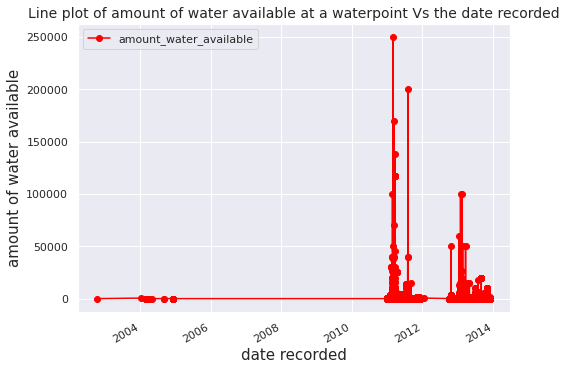

In [75]:
# Line plot of amount of water available at a waterpoint Vs the date recorded
train_final.plot(x="date_recorded",
                 y="amount_water_available",
                 kind="line",
                 color='red',
                 marker='o')
plt.title('Line plot of amount of water available at a waterpoint Vs the date recorded', fontsize=14)
plt.xlabel('date recorded',fontsize=15)
plt.ylabel('amount of water available', fontsize=15)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.show()


**The amount of water available at a waterpoint in the year 2004 was low all the way till 2012 where there was high amounts of water recorded at the waterpoint.**

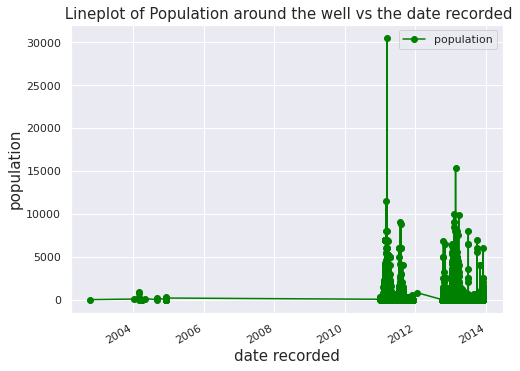

In [76]:
# Lineplot of Population around the well vs the date recorded

train_final.plot(x="date_recorded",
                 y="population",
                 kind="line",
                 color='green',
                 marker='o')
plt.title(' Lineplot of Population around the well vs the date recorded',  fontsize=15)
plt.xlabel('date recorded',  fontsize=15)
plt.ylabel('population',  fontsize=15)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.grid(True)
plt.show()




**The population of people around the well was sparse from 2004 all the way till 2012 where there was a rise in the population.**




### **2. Geographical Maps**

In [77]:
import  plotly.express as px
import pandas as pd

fig = px.density_mapbox(train_final,lat="latitude",lon="longitude",z="amount_water_available",
                        radius=10,center=dict(lat=0,lon=180),zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

### **3. Correlation Matrix**

In [78]:
# Let's display the correlations between the variables
corr =train_final.corr()
corr

,id,amount_water_available,altitude_of_well,longitude,latitude,no_privatewells_aquifer,region_code,district_code,population,construction_year
id,1.000000,-0.007579,-0.007722,-0.004802,0.004128,-0.002507,-0.003313,-0.004696,-0.005044,-0.005848
amount_water_available,-0.007579,1.000000,0.089278,0.022986,-0.069826,0.002042,-0.031754,-0.035379,0.015778,0.078806
altitude_of_well,-0.007722,0.089278,1.000000,0.142959,-0.116639,0.005784,-0.189451,-0.173956,0.112381,0.648160
longitude,-0.004802,0.022986,0.142959,1.000000,-0.413738,0.026133,0.016730,0.140962,0.074188,0.401176
latitude,0.004128,-0.069826,-0.116639,-0.413738,1.000000,0.010414,-0.243385,-0.184210,-0.050237,-0.303326
no_privatewells_aquifer,-0.002507,0.002042,0.005784,0.026133,0.010414,1.000000,-0.024750,-0.007113,0.005006,0.026755
region_code,-0.003313,-0.031754,-0.189451,0.016730,-0.243385,-0.024750,1.000000,0.706632,0.085272,0.015928
district_code,-0.004696,-0.035379,-0.173956,0.140962,-0.184210,-0.007113,0.706632,1.000000,0.068134,0.060502
population,-0.005044,0.015778,0.112381,0.074188,-0.050237,0.005006,0.085272,0.068134,1.000000,0.245457
construction_year,-0.005848,0.078806,0.648160,0.401176,-0.303326,0.026755,0.015928,0.060502,0.245457,1.000000


There was no correlation among  the variables 

### 4  Distribution plot

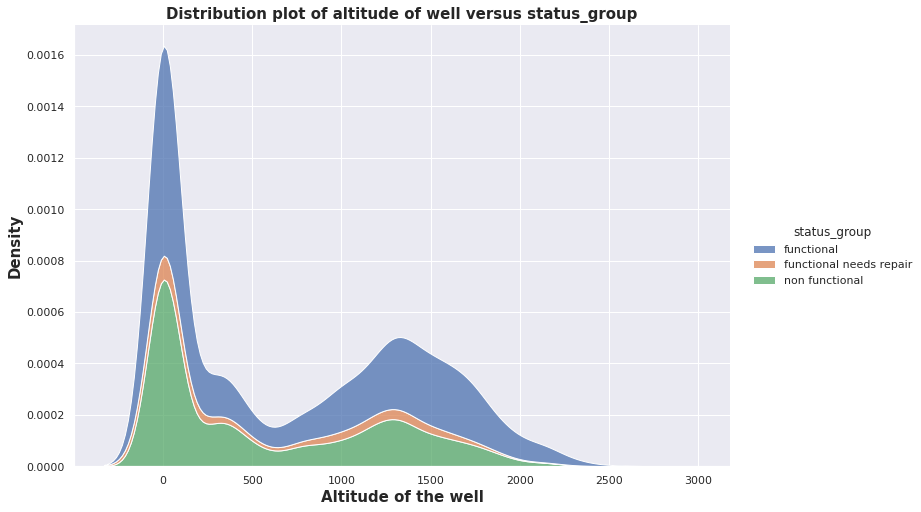

In [79]:
# distribution plot of altitude of well versus status_group
sns.displot(train_final, x='altitude_of_well',
            hue ='status_group',
            kind='kde',
            multiple='stack',
            height=7,
            aspect=1.5)
plt.title('Distribution plot of altitude of well versus status_group', fontsize=15,fontweight='bold')
plt.xlabel('Altitude of the well',fontsize=15, fontweight='bold')
plt.ylabel('Density', fontsize=15, fontweight='bold')
plt.show()

From our distribution plot majority of the water points were functional 

### **5. Stacked column**

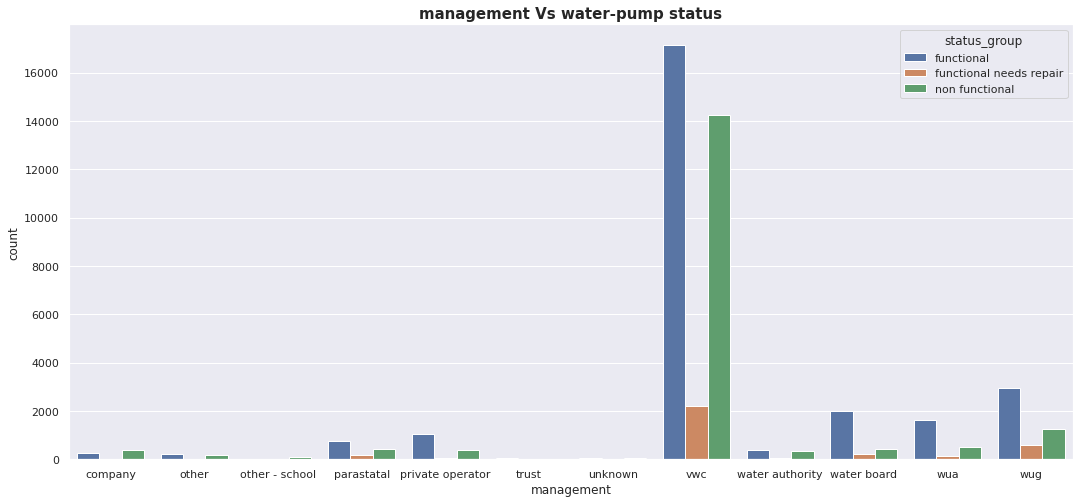

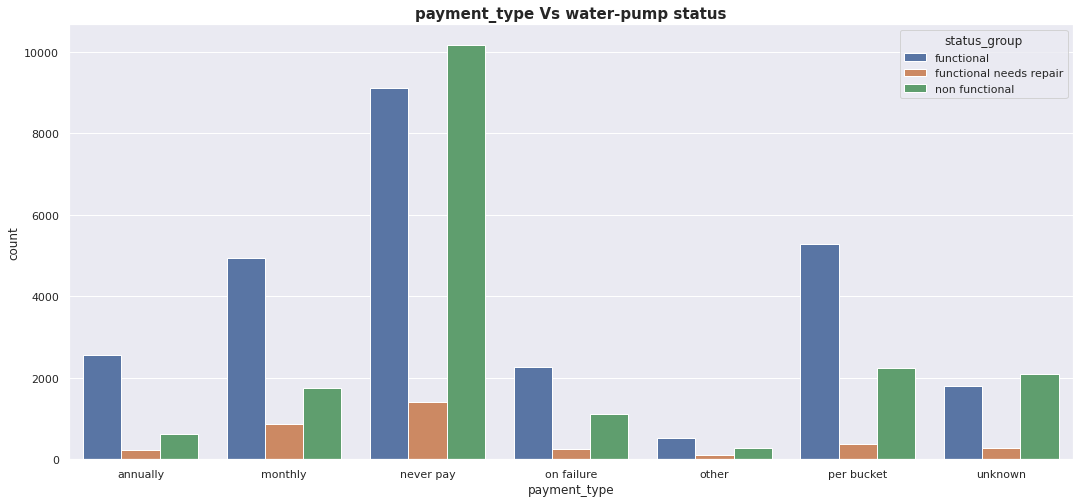

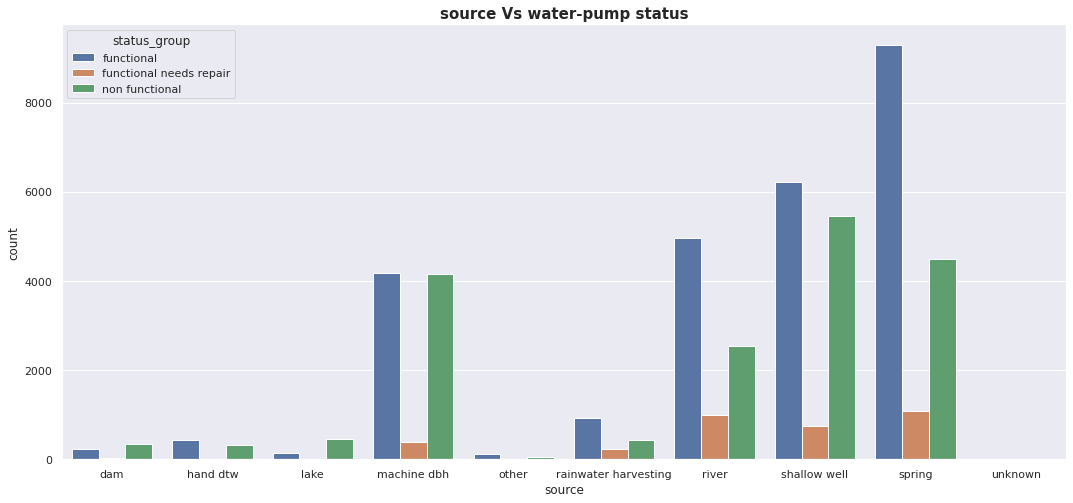

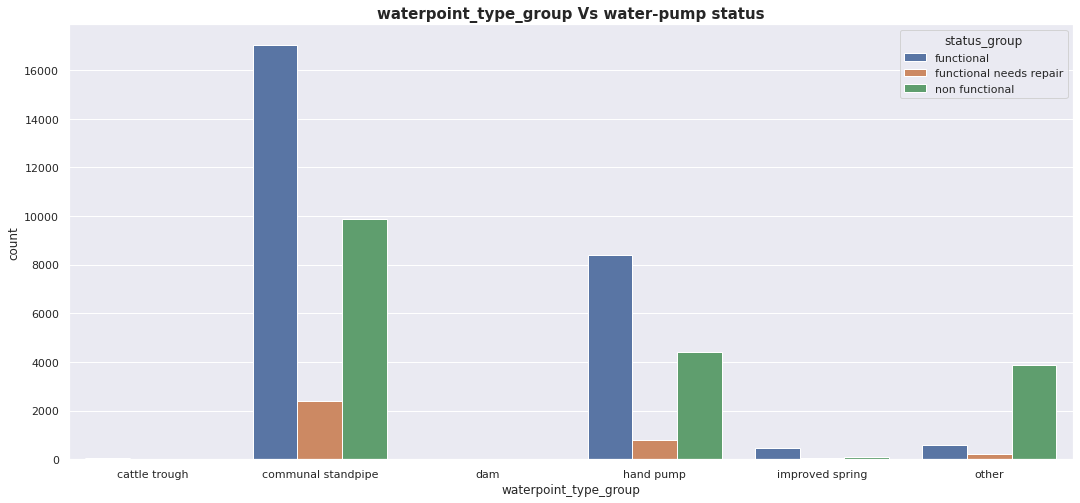

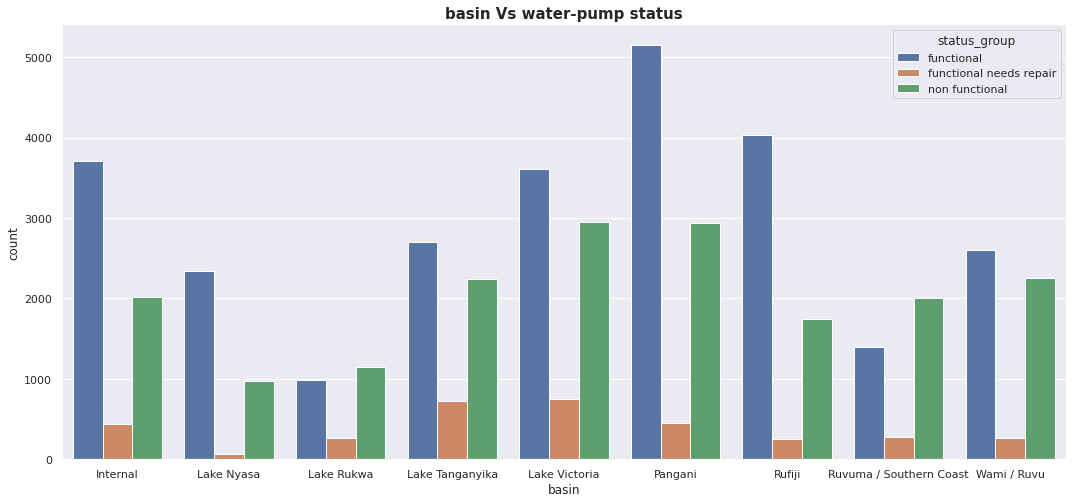

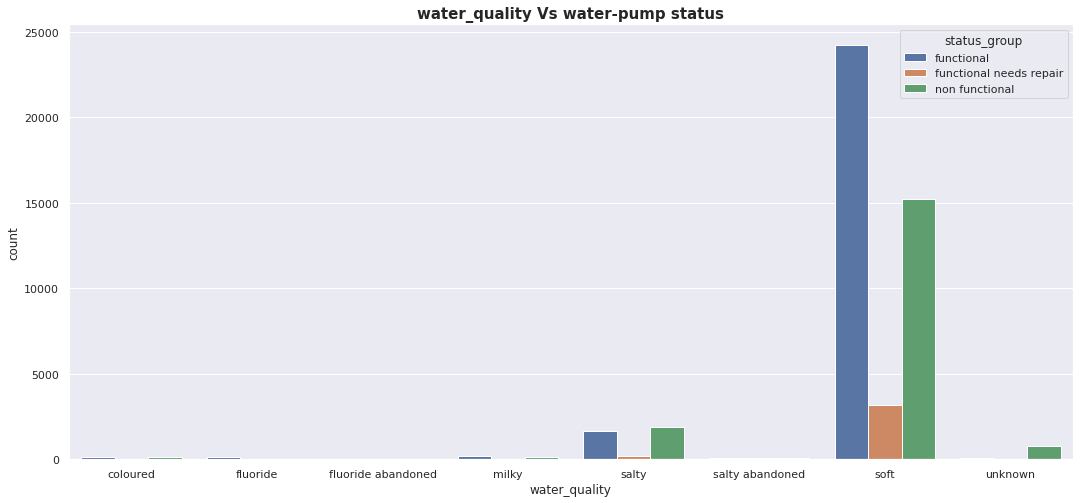

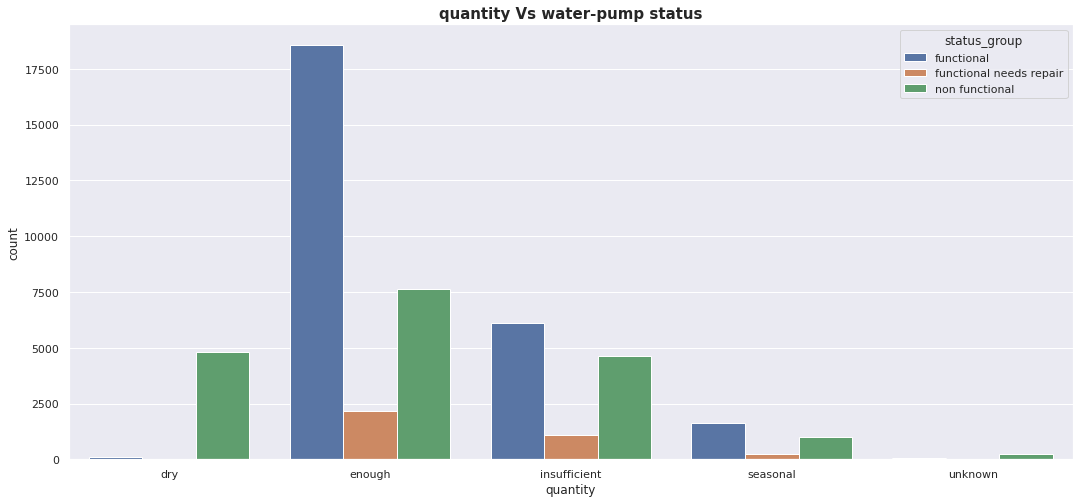

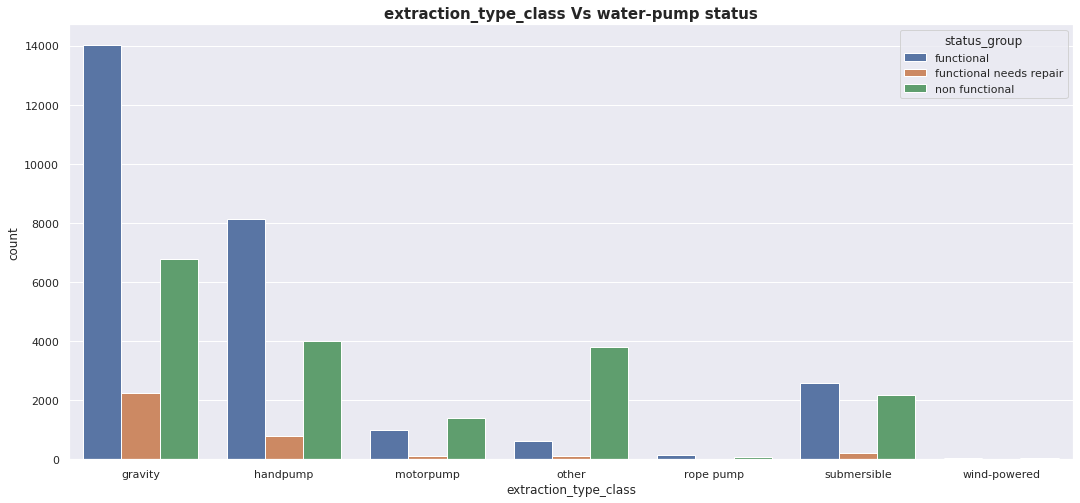

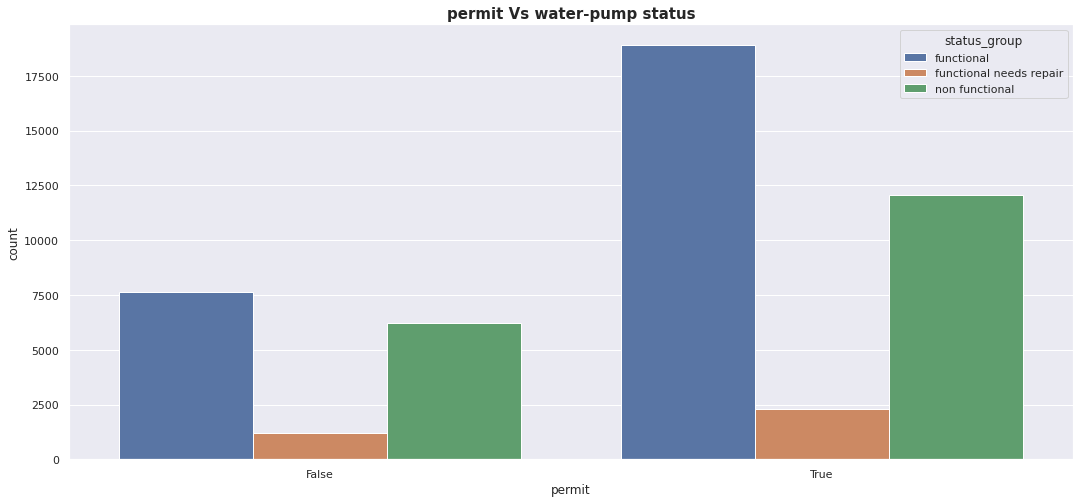

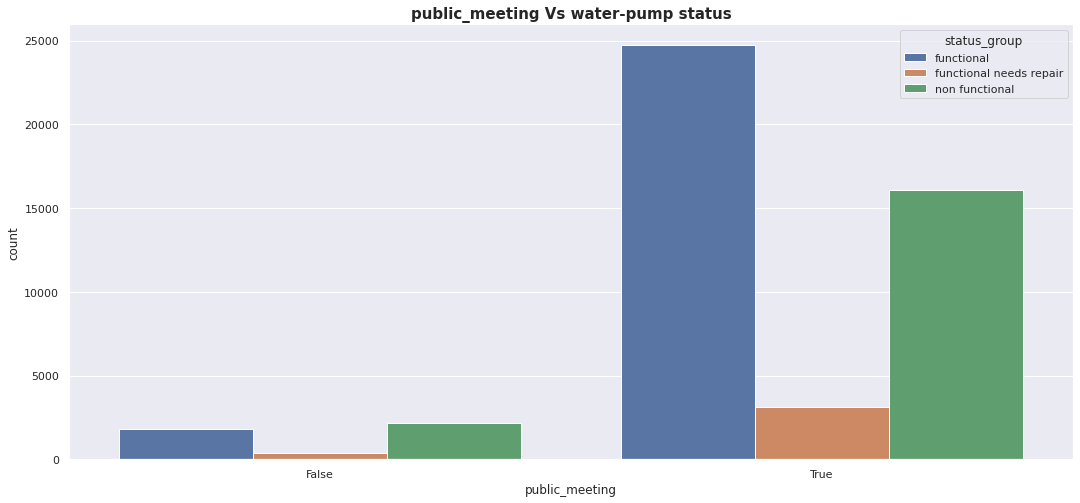

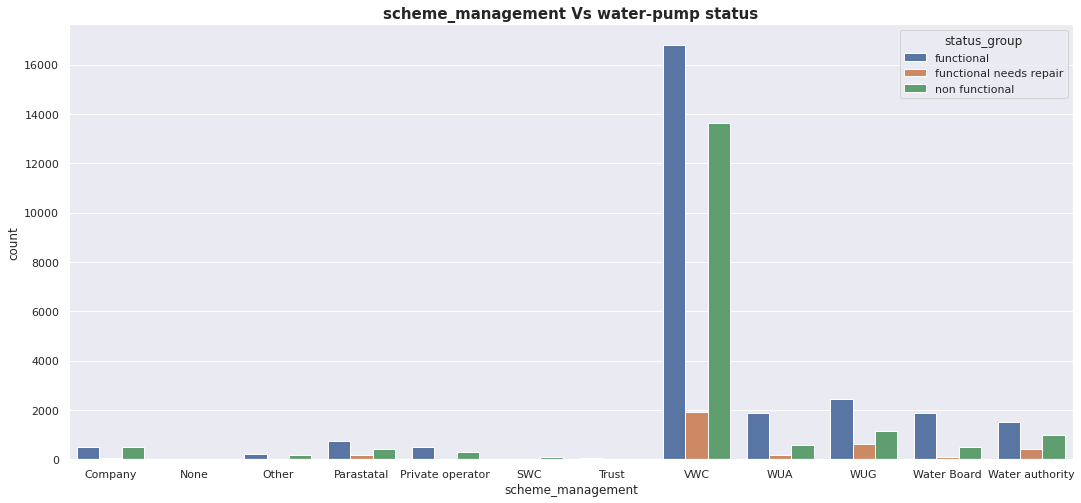

In [80]:
def plot_counts(featureX):
    plt.subplots(figsize=(18,8))
    sns.set(font_scale=1)
    sns.countplot(x=train_final[featureX], hue=train_final['status_group'])
    plt.title(f'{featureX} Vs water-pump status', fontsize=15,fontweight='bold')
    plt.show()
    return

# Management of Waterpoint
plot_counts('management')

# Payment Type of Waterpoint
plot_counts('payment_type')

# Water source of Waterpoint
plot_counts('source' )

# Water type group of Waterpoint
plot_counts("waterpoint_type_group")

# Basin of Waterpoint
plot_counts("basin")

# Water quality of Waterpoint
plot_counts("water_quality")

# Quantity of Waterpoint
plot_counts("quantity")

# extraction_type_class of Waterpoint
plot_counts("extraction_type_class")

# permit of Waterpoint
plot_counts("permit")

# public_meeting of Waterpoint
plot_counts("public_meeting")

# scheme_management  of Waterpoint
plot_counts("scheme_management")



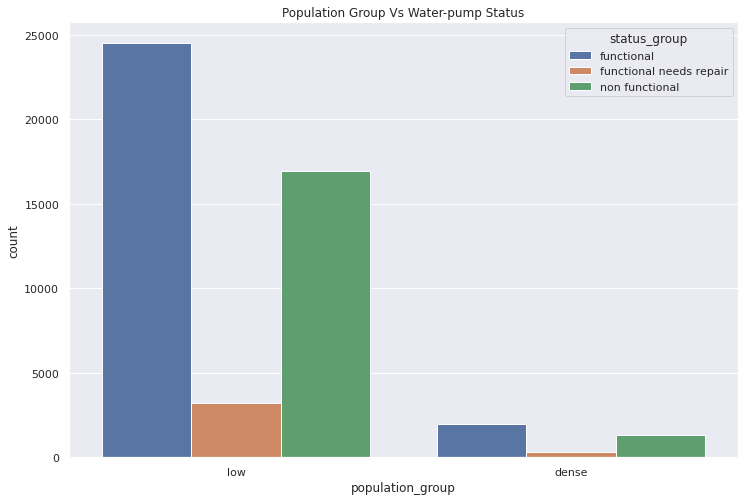

In [81]:
# Create Population Group to better assess the sparse data
def get_population_group(x):
    if x <= 500:
        return 'low'
    else:
        return 'dense'
    
train_final['population_group'] = train_final['population'].apply(get_population_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train_final['population_group'], hue=train_final['status_group'])
plt.title('Population Group Vs Water-pump Status')
plt.show()

In a low populated area the waterpoint is most likely to be functional as compared to densely populated area. Also the waterpoints functioning needs repair are equally high in the low populated area

Text(0.5, 0, 'source')

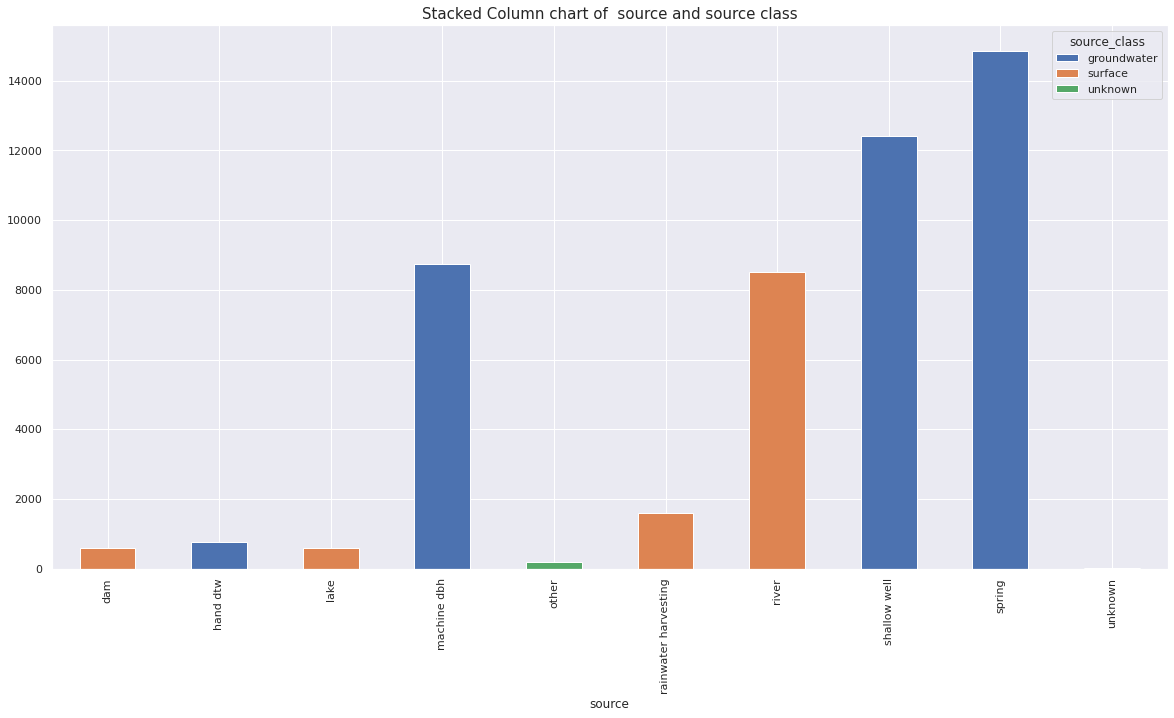

In [82]:
# Stacked Column Chart 
pd.crosstab(train_final['source'],train_final['source_class']).plot(kind="bar",stacked=True,figsize=(20,10))
plt.title('Stacked Column chart of  source and source class',fontsize=(15))
plt.xlabel('source',fontsize=(12))


From our plot above this dataset has correctly classified the sources to their respective source class

Text(0.5, 0, 'basin')

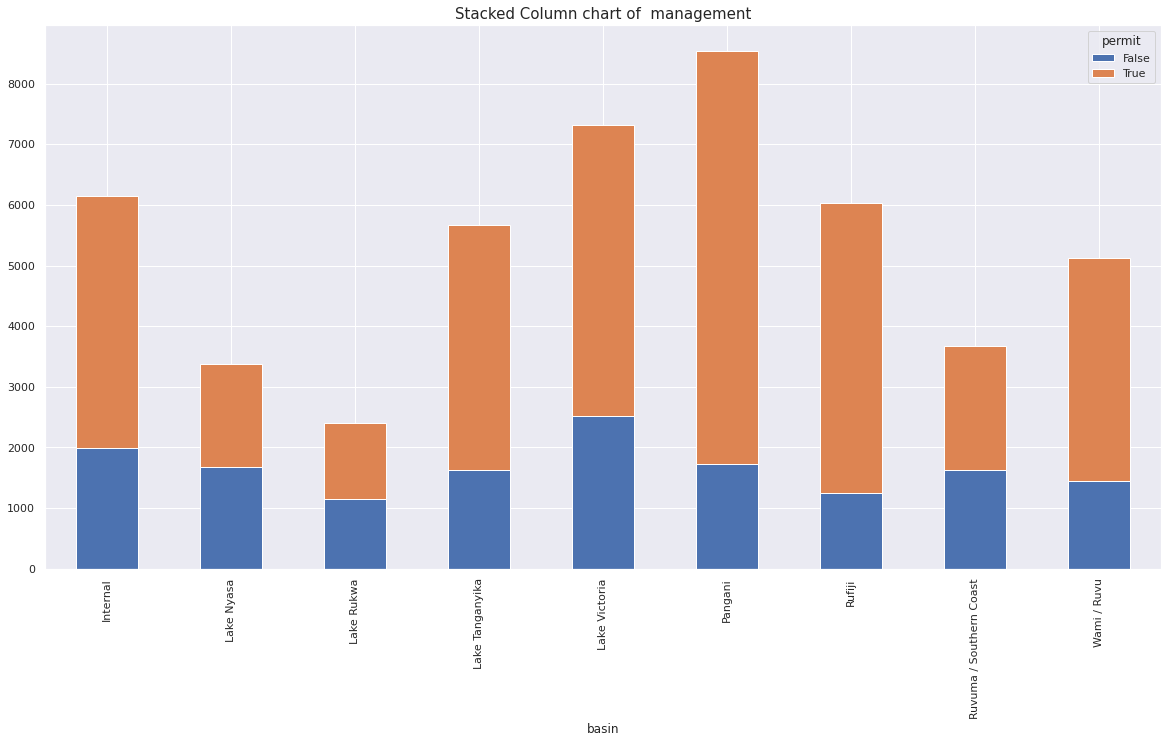

In [83]:
# Stacked Column Chart 
pd.crosstab(train_final['basin'],train_final['permit']).plot(kind="bar",stacked=True,figsize=(20,10))
plt.title('Stacked Column chart of  management',fontsize=(15))
plt.xlabel('basin',fontsize=(12))


From our plot majority of the water basins had permits.

##**c) Multivariate Analysis**

In [84]:
# dropping some columns
train_df = train_final.drop(train_final[['id','longitude','latitude','region_code','district_code','funder','installer','water_quality','wpt_name','subvillage','local_gvt_auth','ward','quantity_group','source_type','waterpoint_type_group']], axis =1)
train_df.head(0)

,amount_water_available,date_recorded,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,population_group


In [85]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df['basin'] = labelencoder.fit_transform(train_df['basin'])
train_df['region'] = labelencoder.fit_transform(train_df['region'])
train_df['public_meeting'] = labelencoder.fit_transform(train_df['public_meeting'])
train_df['recorded_by'] = labelencoder.fit_transform(train_df['recorded_by'])
train_df['scheme_management'] = labelencoder.fit_transform(train_df['scheme_management'])
train_df['permit'] = labelencoder.fit_transform(train_df['permit'])
train_df['extraction_type'] = labelencoder.fit_transform(train_df['extraction_type'])
train_df['extraction_type_group'] = labelencoder.fit_transform(train_df['extraction_type_group'])
train_df['extraction_type_class'] = labelencoder.fit_transform(train_df['extraction_type_class'])
train_df['management'] = labelencoder.fit_transform(train_df['management'])
train_df['management_group'] = labelencoder.fit_transform(train_df['management_group'])
train_df['payment'] = labelencoder.fit_transform(train_df['payment'])
train_df['payment_type'] = labelencoder.fit_transform(train_df['payment_type'])
train_df['quality_group'] = labelencoder.fit_transform(train_df['quality_group'])
train_df['quantity'] = labelencoder.fit_transform(train_df['quantity'])
train_df['source'] = labelencoder.fit_transform(train_df['source'])
train_df['source_class'] = labelencoder.fit_transform(train_df['source_class'])
train_df['waterpoint_type'] = labelencoder.fit_transform(train_df['waterpoint_type'])
train_df['status_group'] = labelencoder.fit_transform(train_df['status_group'])
train_df['population_group'] = labelencoder.fit_transform(train_df['population_group'])
train_df['construction_year'] = labelencoder.fit_transform(train_df['construction_year'])

In [86]:
train_df = train_df.drop(['date_recorded','population_group'], axis=1)

In [87]:
train_df.head(2)

,amount_water_available,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,1390,0,1,3,109,1,0,7,0,40,3,1,0,7,4,2,0,2,1,8,0,1,0
2,25.0,686,0,5,8,250,1,0,7,1,50,3,1,0,7,4,4,5,2,1,0,1,2,0


### **Correlation plots**

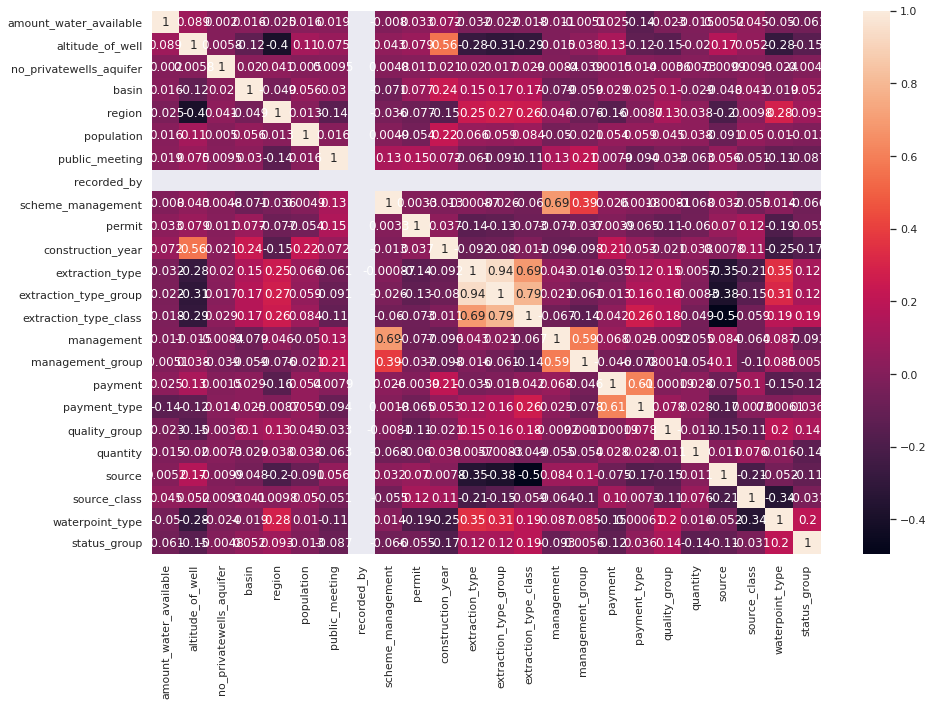

In [88]:
# Let's display the correlations between the variables
corr = train_df.corr()
corr
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

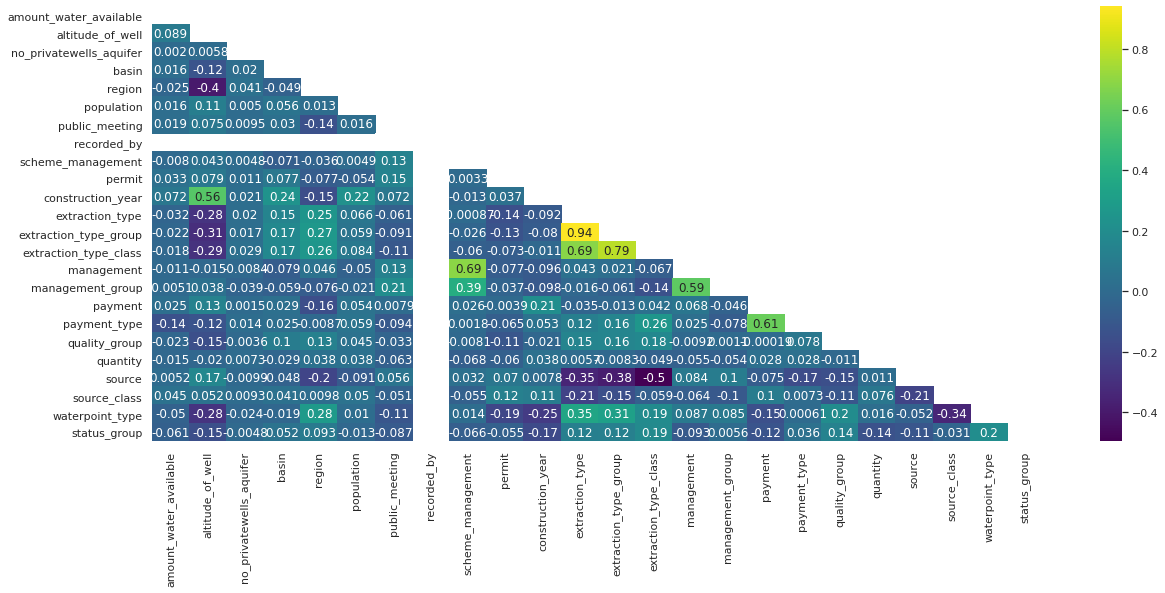

In [89]:
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(train_df.corr(),
mask=mask,annot=True,cmap="viridis")

### **Multicollinearity**

In [90]:
y = train_final.select_dtypes(include='number')
y.columns

Index(['id', 'amount_water_available', 'altitude_of_well', 'longitude',
       'latitude', 'no_privatewells_aquifer', 'region_code', 'district_code',
       'population', 'construction_year'],
      dtype='object')

In [91]:
# checking for multicollinearity using VIF
correlations = train_df[['amount_water_available','altitude_of_well','no_privatewells_aquifer','population']].corr()

VIF = pd.DataFrame(np.linalg.inv(correlations.values),
                   index=correlations.index,
                   columns=correlations.columns)
VIF

,amount_water_available,altitude_of_well,no_privatewells_aquifer,population
amount_water_available,1.008071,-0.089331,-0.001512,-0.005858
altitude_of_well,-0.089331,1.020735,-0.005154,-0.113276
no_privatewells_aquifer,-0.001512,-0.005154,1.000055,-0.004403
population,-0.005858,-0.113276,-0.004403,1.012844


There is no adverse multicollinearity in our numerical columns.

# **7.0 Implementing the Solution**

In [92]:
train_df.shape

(48288, 24)

In [93]:
train_df.columns

Index(['amount_water_available', 'altitude_of_well', 'no_privatewells_aquifer',
       'basin', 'region', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'quality_group',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'status_group'],
      dtype='object')

In [108]:
train_df.head(2)

,amount_water_available,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,1390,0,1,3,109,1,0,7,0,40,3,1,0,7,4,2,0,2,1,8,0,1,0
2,25.0,686,0,5,8,250,1,0,7,1,50,3,1,0,7,4,4,5,2,1,0,1,2,0


## Sampling

### Synthetic Minority Oversampling Technique(*SMOTE*) 

In [94]:
# class count
status_count_0, status_count_1, status_count_2 = train_df['status_group'].value_counts()

# Separate class
status_0 = train_df[train_df['status_group'] == 0]
status_1 = train_df[train_df['status_group'] == 1]# print the shape of the class
status_2 = train_df[train_df['status_group'] == 2]
print('status 0:', status_0.shape)
print('status 1:', status_1.shape)
print('status 2:', status_2.shape)    

status 0: (26517, 24)
status 1: (3498, 24)
status 2: (18273, 24)


Class=0, n=26517 (33.333%)
Class=2, n=26517 (33.333%)
Class=1, n=26517 (33.333%)


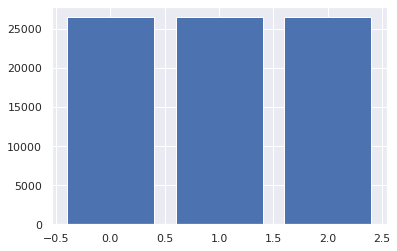

In [95]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

# split into input and output elements
X = train_df.iloc[:,1:23]
y = train_df['status_group']

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### **Undersampling**

In [96]:
# Class count
#count_class_0, count_class_1, count_class_2 = train_df['status_group'].value_counts()

#count_class_0, count_class_1, count_class_2 3

In [97]:
#print(df_class_0.shape)

In [98]:

# Divide by class
#df_class_0 = train_df[train_df['status_group'] == 0]
#df_class_1 = train_df[train_df['status_group'] == 1]
#df_class_2 = train_df[train_df['status_group'] == 2]

# Random under-sampling
#df_class_0_under = df_class_0.sample(count_class_2)
#df_class_1_under = df_class_1.sample(count_class_2)
#df_test_under = pd.concat([df_class_0_under, df_class_1_under, df_class_2], axis=0)

#print('Random under-sampling:')
#print(df_test_under['status_group'].value_counts())

#df_test_under['status_group'].value_counts().plot(kind='bar', title='Count (status_group)')

In [99]:
X = train_df.iloc[:,1:23]
y = train_df['status_group'].values

In [100]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Dimensionality reduction**

In [101]:
# Separating our target label (type) from the other features
X = train_df.iloc[:,1:23]
y = train_df['status_group'].values
# Subject our features to LDA model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)     

,0
public_meeting,1.620008e-01
quantity,1.600183e-01
permit,8.265130e-02
management,8.169257e-02
extraction_type_group,7.665292e-02
payment,5.774974e-02
construction_year,9.120760e-03
no_privatewells_aquifer,2.319225e-04
population,1.079797e-05
recorded_by,9.076005e-17


Feature Selection

In [109]:
cat = train_final.select_dtypes(include='category')
cat.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'local_gvt_auth', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [111]:
cat.head(1)

,funder,installer,wpt_name,basin,subvillage,region,local_gvt_auth,ward,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [130]:
# defining  our independent  and dependent features

X = train_df.iloc[:,1:23].values
y = train_df['status_group'].values

In [233]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_features = train_df.columns.to_list()
test_features.remove('status_group')
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()
# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

[('amount_water_available', 0.17), ('altitude_of_well', 0.0), ('no_privatewells_aquifer', 0.04), ('basin', 0.05), ('region', 0.1), ('population', 0.01), ('public_meeting', 0.0), ('recorded_by', 0.02), ('scheme_management', 0.02), ('permit', 0.1), ('construction_year', 0.03), ('extraction_type', 0.03), ('extraction_type_group', 0.03), ('extraction_type_class', 0.03), ('management', 0.01), ('management_group', 0.04), ('payment', 0.03), ('payment_type', 0.02), ('quality_group', 0.16), ('quantity', 0.03), ('source', 0.01), ('source_class', 0.07)]

Variable: amount_water_available Importance: 0.17
Variable: quality_group        Importance: 0.16
Variable: region               Importance: 0.1
Variable: permit               Importance: 0.1
Variable: source_class         Importance: 0.07
Variable: basin                Importance: 0.05
Variable: no_privatewells_aquifer Importance: 0.04
Variable: management_group     Importance: 0.04
Variable: construction_year    Importance: 0.03
Variable: extra

In [ ]:
# predict based on the model we have trained
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

array([[4618,  137,  549],
       [ 414,  223,  122],
       [ 774,   60, 2761]])

In [ ]:
# accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7871194864361152


In [ ]:
# classification report
print('\n Classification report\n',classification_report(y_test,y_pred))


 Classification report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      5304
           1       0.53      0.29      0.38       759
           2       0.80      0.77      0.79      3595

    accuracy                           0.79      9658
   macro avg       0.71      0.64      0.67      9658
weighted avg       0.78      0.79      0.78      9658



we obtained an accuracy of 79%

**Optimizing our model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = RandomForestClassifier()

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth =  np.arange(1,32,4)
min_samples_leaf =  [1, 2, 4]
min_samples_split = [2, 5, 10]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth= max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# summarize results
print('These are the best parameters for the model using a 10 fold cross validation :\n\n', grid_result.best_params_)

In [ ]:
# Using our model to make a prediction

forest = RandomForestClassifier(max_features= 'sqrt', n_estimators=1000)

forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7875336508593912
[[4611  140  553]
 [ 405  227  127]
 [ 763   64 2768]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      5304
           1       0.53      0.30      0.38       759
           2       0.80      0.77      0.79      3595

    accuracy                           0.79      9658
   macro avg       0.71      0.65      0.67      9658
weighted avg       0.78      0.79      0.78      9658



## Multinomial Logistic Regression

In [235]:
# loading our libraries
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
# Predict the response for the test set
y_pred = LogReg.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6309794988610479
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.61      0.50      0.55      3595

    accuracy                           0.63      9658
   macro avg       0.42      0.44      0.42      9658
weighted avg       0.58      0.63      0.60      9658



**Optimizing our model**

In [237]:
LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

parameters = {'penalty' : ['l1','l2'],
              'C' : [0.001,0.01,0.1,1.0,10,100,1000]}
              
# Creating grid search using 10-fold cross validation
clf = GridSearchCV(LogReg, param_grid = parameters, cv=10, scoring='accuracy', refit=True , n_jobs = -1)


clf.fit(X_train, y_train)
print('These are the best parameters for the model using a 10 fold cross validation :\n\n', clf.best_params_)

These are the best parameters for the model using a 10 fold cross validation :

 {'C': 0.01, 'penalty': 'l2'}


In [238]:
# Using our model to make a prediction

LogReg = LogisticRegression(C = 0.01, penalty= 'l2')

LogReg = LogReg.fit(X_train,y_train)

y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6307724166494099
[[4297    0 1007]
 [ 630    0  129]
 [1800    0 1795]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.61      0.50      0.55      3595

    accuracy                           0.63      9658
   macro avg       0.42      0.44      0.42      9658
weighted avg       0.58      0.63      0.60      9658



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
# Let's now build the svm model 
model = SVC()
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7499482294470905
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      5304
           1       0.60      0.03      0.06       759
           2       0.84      0.63      0.72      3595

    accuracy                           0.75      9658
   macro avg       0.72      0.53      0.53      9658
weighted avg       0.75      0.75      0.72      9658



Optimizing our model

In [ ]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.554641 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.549153 (0.000061) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.554641 (0.003531) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.486021 (0.028119) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.549122 (0.000051) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.549143 (0.000021) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.488041 (0.024129) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.549132 (0.000034) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.549143 (0.000021) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.474694 (0.040357) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
model = SVC( C = 1.0, gamma = 'scale', kernel = 'rbf')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7499482294470905
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      5304
           1       0.60      0.03      0.06       759
           2       0.84      0.63      0.72      3595

    accuracy                           0.75      9658
   macro avg       0.72      0.53      0.53      9658
weighted avg       0.75      0.75      0.72      9658



## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7581279768067923
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      5304
           1       0.47      0.25      0.32       759
           2       0.78      0.71      0.74      3595

    accuracy                           0.76      9658
   macro avg       0.67      0.61      0.63      9658
weighted avg       0.75      0.76      0.75      9658



Optimizing our model

In [ ]:
#K-Nearest Neighbours model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = np.arange(1,21,2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.708989 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
0.640587 (0.004958) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.640587 (0.004958) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.663422 (0.002491) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.662546 (0.003336) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.665900 (0.002701) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.672251 (0.002515) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.666370 (0.001236) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.676869 (0.002513) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.666487 (0.001990) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.680162 (0.001611) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.665383

In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 15, weights ='distance')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7769724580658521
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5304
           1       0.50      0.25      0.33       759
           2       0.80      0.74      0.77      3595

    accuracy                           0.78      9658
   macro avg       0.69      0.62      0.64      9658
weighted avg       0.77      0.78      0.77      9658



**Features identified using Random Forest**

In [ ]:
X = train_df[['amount_water_available','quality_group','region','permit','source_class','basin','no_privatewells_aquifer',
              'management_group','construction_year','extraction_type_group','extraction_type_class','payment','quantity']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 15, weights ='distance')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7706564506108925
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      5304
           1       0.50      0.25      0.33       759
           2       0.80      0.72      0.76      3595

    accuracy                           0.77      9658
   macro avg       0.69      0.62      0.64      9658
weighted avg       0.76      0.77      0.76      9658



**Features identified using LDA**

In [ ]:
X = train_df[['public_meeting','quantity','management','permit','extraction_type_group','payment','construction_year',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 15, weights ='distance')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7427003520397598
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      5304
           1       0.42      0.17      0.24       759
           2       0.77      0.69      0.73      3595

    accuracy                           0.74      9658
   macro avg       0.64      0.57      0.59      9658
weighted avg       0.73      0.74      0.73      9658



## Naive Bayes Classifier

In [ ]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() 
model = clf.fit(X_train, y_train)
# Predicting our test predictors
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.5548767860840754
[[3266  806 1232]
 [ 383  232  144]
 [1369  365 1861]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.63      5304
           1       0.17      0.31      0.21       759
           2       0.57      0.52      0.54      3595

    accuracy                           0.55      9658
   macro avg       0.46      0.48      0.46      9658
weighted avg       0.58      0.55      0.57      9658



## Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
ridgeClass = RidgeClassifier(alpha=0.1)

ridgeClass= ridgeClass.fit(X_train,y_train)

y_pred = ridgeClass.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6304617933319527
[[4282    0 1022]
 [ 625    0  134]
 [1788    0 1807]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.61      0.50      0.55      3595

    accuracy                           0.63      9658
   macro avg       0.42      0.44      0.42      9658
weighted avg       0.58      0.63      0.60      9658



Optimizing our model

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.637805 using {'alpha': 0.1}
0.637805 (0.006212) with: {'alpha': 0.1}
0.637805 (0.006212) with: {'alpha': 0.2}
0.637805 (0.006212) with: {'alpha': 0.3}
0.637805 (0.006212) with: {'alpha': 0.4}
0.637798 (0.006207) with: {'alpha': 0.5}
0.637798 (0.006207) with: {'alpha': 0.6}
0.637798 (0.006207) with: {'alpha': 0.7}
0.637791 (0.006217) with: {'alpha': 0.8}
0.637791 (0.006217) with: {'alpha': 0.9}
0.637798 (0.006205) with: {'alpha': 1.0}


In [ ]:
# Using our model to make a prediction

ridgeClass = RidgeClassifier(alpha=0.1)

ridgeClass= ridgeClass.fit(X_train,y_train)

y_pred = ridgeClass.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6304617933319527
[[4282    0 1022]
 [ 625    0  134]
 [1788    0 1807]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.61      0.50      0.55      3595

    accuracy                           0.63      9658
   macro avg       0.42      0.44      0.42      9658
weighted avg       0.58      0.63      0.60      9658



## Multi Layer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() 

# fitting the model
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6856492027334852
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      5304
           1       0.50      0.01      0.03       759
           2       0.73      0.53      0.61      3595

    accuracy                           0.69      9658
   macro avg       0.63      0.48      0.47      9658
weighted avg       0.68      0.69      0.65      9658



Optimizing our model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.702493 using {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.610628 (0.003090) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.688350 (0.024512) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.601930 (0.020528) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.702493 (0.004793) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.610815 (0.005637) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.701790 (0.009722) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant

In [ ]:
# Instatiating the model
mlp = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (10, 30, 10), learning_rate= 'adaptive', solver='adam') 

# fitting the model
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6828535928763719
[[4353   17  934]
 [ 581   25  153]
 [1363   15 2217]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      5304
           1       0.44      0.03      0.06       759
           2       0.67      0.62      0.64      3595

    accuracy                           0.68      9658
   macro avg       0.60      0.49      0.48      9658
weighted avg       0.66      0.68      0.66      9658



# **Challenging the Solution**

## **Using XGBoost**

### **Features identified using Random Forest**

In [109]:
# defining  our independent  and dependent features

X = train_df[['amount_water_available','quality_group','region','permit','source_class','basin','no_privatewells_aquifer',
              'management_group','construction_year','extraction_type_group','extraction_type_class','payment','quantity']].values
y = train_df['status_group'].values

In [110]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7287223027541934
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      5304
           1       0.00      0.00      0.00       759
           2       0.82      0.59      0.68      3595

    accuracy                           0.73      9658
   macro avg       0.50      0.51      0.49      9658
weighted avg       0.69      0.73      0.69      9658



### **Features identified using LDA**

In [113]:
X = train_df[['public_meeting','quantity','management','permit','extraction_type_group','payment','construction_year',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [114]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7218885897701387
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      5304
           1       0.00      0.00      0.00       759
           2       0.80      0.58      0.67      3595

    accuracy                           0.72      9658
   macro avg       0.50      0.50      0.49      9658
weighted avg       0.68      0.72      0.68      9658



## **Using Lightgbm**

In [117]:
pip install  lightgbm

### **Features identified using Random Forest**

In [118]:
# defining  our independent  and dependent features

X = train_df[['amount_water_available','quality_group','region','permit','source_class','basin','no_privatewells_aquifer',
              'management_group','construction_year','extraction_type_group','extraction_type_class','payment','quantity']].values
y = train_df['status_group'].values

In [119]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [122]:
y_pred = clf.predict(X_test)

In [123]:

#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7600952578173535
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      5304
           1       0.60      0.11      0.19       759
           2       0.82      0.67      0.74      3595

    accuracy                           0.76      9658
   macro avg       0.72      0.56      0.58      9658
weighted avg       0.76      0.76      0.74      9658



### **Features identified using LDA**

In [124]:
X = train_df[['public_meeting','quantity','management','permit','extraction_type_group','payment','construction_year',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [125]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [128]:
y_pred = clf.predict(X_test)

In [129]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7402153655001036
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      5304
           1       0.71      0.04      0.07       759
           2       0.81      0.64      0.71      3595

    accuracy                           0.74      9658
   macro avg       0.74      0.53      0.53      9658
weighted avg       0.75      0.74      0.71      9658



# Conclusions 


* From our EDA we discovered that majority of the water points were functional taking 54.9%, non-functional 37.8% and functional needs repair 7.2%
* We also found out that majority water features in Tanzania is good for use, enough and soft.
* We also discovered that there was no correlation among the variables 
* The waterpoints managed by the village water commitee were functional and also non_functional
* The ratio of non functional to functional water points is higher when the is no payment or the payment is unkown compared  to other payment type methods such as pay per bucket , pay annually and pay on failure.
* Based on the water source spring had the  highest gap between the functional and the non functional water points.
* Based on the water point type group communal standpipe had the highest margin in functional to non functional water points while other has more non functional water points compared to functional.
* Majority of the records show that the most popular water basin is lake Pangani and also has the highest functional water points.
* Gravity is the most popular extraction type followed by hand pump this could be because Tanzania exibits a mountainous terrain and its also cheaper.
* Most of the water points that had permits were more functional.
* Majority of the records show that as a result of high public meetings waterpoints were functional.

From our random forest the top 10 important features were:
*  Variable: amount_water_available Importance: 0.17
*  Variable: quality_group        Importance: 0.16
*  Variable: region               Importance: 0.1
*  Variable: permit               Importance: 0.1
*  Variable: source_class         Importance: 0.07
*  Variable: basin                Importance: 0.05
*  Variable: no_privatewells_aquifer Importance: 0.04
*  Variable: management_group     Importance: 0.04
*  Variable: construction_year    Importance: 0.03
*  Variable: extraction_type      Importance: 0.03


Our top performing models were Random Forest at 79% , K-Nearest Neighbours at 78% and Lightgbm at 76%

Below is the performance of our other models
* Logistic Regression - 63%
* Random Forest - 79%
* SVM - 75%
* K-nearest neighbour - 78%
* Naive Bayes - 55%
* Ridge Classifier - 63%
* Multi Layer Perceptron Classifier - 68%
* XGBoost - 73%
* Lightgbm -  76%

# Recommendations